<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 6 (Assignment) -- Generative models </h2>

# Exercise 0
Before tackling all those exciting tasks of this notebook, the neccessary Python modules need to be loaded. Have a look at the notebook discussed during the lecture, and import the following modules/symbols:

- <code>u6_utils</code>
- <code>matplotlib.pyplot</code>
- <code>matplotlib.image</code>
- <code>numpy</code>
- <code>os</code>
- <code>torch</code>
- <code>torch.autograd.Variable</code>
- <code>types.SimpleNamespace</code>

In [1]:
import u6_utils as u6
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import torch
from torch.autograd import Variable
from types import SimpleNamespace

Afterwards, check if the <code>torch</code> module was correctly imported, by computing the <i>cumsum</i> of <code>[7, 2, 4, 9]</code> and printing the result. Moreover, check the version of your <i>PyTorch</i> installation (in case of problems with different Python modules, it is <i>always</i> a good idea to include their <i>version numbers</i> to help others giving a more specific support).

In [45]:
torch.cumsum(torch.as_tensor([7, 2, 4, 9], dtype=torch.float32), dim=0)

tensor([ 7.,  9., 13., 22.])

In [46]:
torch.__version__

'1.3.1+cpu'

As all plots <i>created</i> in this assignment are <i>stored</i> in a specific <i>directory</i>, create a <i>subdirectory</i> termed <code>samples</code> in the current working directory.

In [2]:
if not os.path.exists(os.path.join(r'.', r'samples')):
    os.makedirs(os.path.join(r'.', r'samples'))

# Exercise 1
Before loading any <i>data set</i> or defining any <i>neural network</i>, some hyperparameters used throughout this assignment should be set (some entries might be <i>reset</i> in the course of some tasks). Hence, for the <b>first task</b> of this exercise, define an <i>instance</i> of the type <code>SimpleNamespace</code>, and set the hyperparameters accordingly:

- <code>batch_size = 64</code>
- <code>test_batch_size = 1000</code>
- <code>epochs = 10</code>
- <code>lr = 0.001</code>
- <code>weight_decay = 0.00005</code>

The field <code>log_interval</code> can be chosen freely as well as the <i>device</i> on which to compute.

In [3]:
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=10, lr=0.001, weight_decay=0.00005, log_interval=100)


In this exercise you will be working with a data set composed of various <i>images</i> of fashion items. For curious minds, more information regarding this data set can be found at (maybe it looks already familiar to you):

<cite>Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv:1708.07747</cite>

Moreover, perform the following steps prior to unleashing your cumulated knowledge about <i>machine learning</i> on the data:

- Set the <i>random seed</i> to $s = 42$ using the <i>PyTorch</i> interface.
- Load the <i>Fashion-MNIST</i> data set (returns the <i>training</i> as well as the <i>test</i> set data loader).
- Display the first <i>36</i> images of the <i>Fashion-MNIST</i> data set.

Can you identify possible <i>labels</i> of the displayed images?

In [6]:
X = torch.rand(42) 


In [7]:
use_cuda = torch.cuda.is_available()
train_loader, test_loader = u6.get_FashionMNIST_data(args, use_cuda)


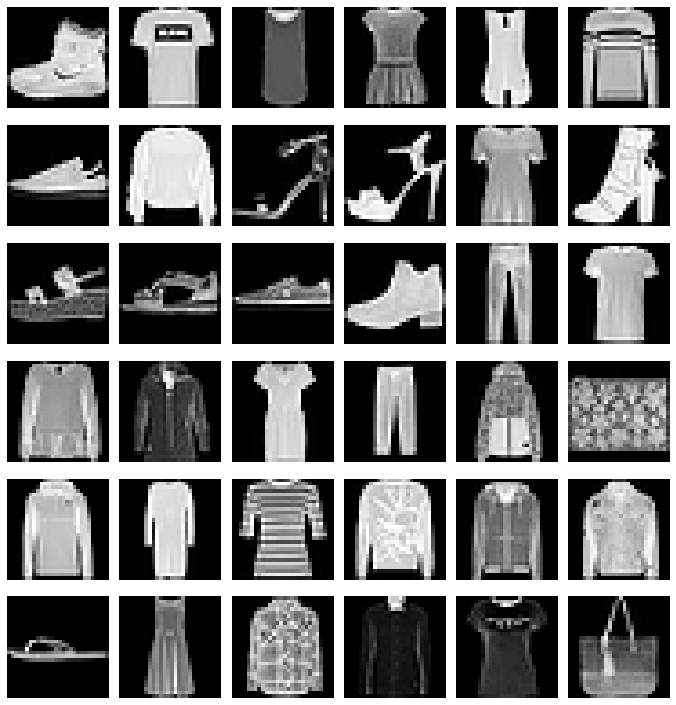

In [6]:
u6.display_FashionMNIST(train_loader, 36)


Yes, I think so.
Labels:
1. row: shoe | t-shirt | (maybe a) dress | dress | dungarees | sweater
2. row: shoe | sweater | shoe | shoe | dres | shoe
3. row: shoe | shoe | shoe | shoe | trousers | t-shirt
4. row: sweater | jacket | dress | trousers | hoodie | (maybe a) bag
5. row: sweater | dress or nightdress | t-shirt | swater | hoodie | sweater
6. row: shoe | dress | shirt | jacket | t-shirt | bag

It is difficult to distinguish between a shirt and sweater on pictures.

In order to define any <i>generative</i> neural network (e.g. <i>autoencoders</i> and their various variants) for further processing of the data set, some minimal knowledge about the <i>structure</i> of the images is required:

- Find out the <i>input dimensionality</i> of the data set.

Moreover, with respect to possible transitions between labels in a hypothetical <i>latent space</i>, are some targets <i>more</i> suited to be transitioned into each other than others? Try to argue about <i>possible</i> reasons.

In [10]:
image_shape = train_loader.dataset[0][0].shape
input_dim = image_shape[0]*image_shape[1]*image_shape[2]
print(r'The input dimensionality has an amount of: {}'.format(input_dim))
      

The input dimensionality has an amount of: 784


I think that the labels "sweater" and "shirt" are close to each other. A shirt with long arms can look like a sweater on a black-and-white, small and pixelated picture and vice versa. So it can more easily happen that the algorithm choose in the test set the wrong label than in the case of other labels. 


As <i>autoencoders</i> (and their variants) are very handy tools for <i>projecting</i> data sets <i>down</i> to a specific dimensionality (often termed <i>compression</i>), a comparison to other established methods is appropriate. For this very purpose, recall your knowledge about <i>dimensionality reduction techniques</i> and perform the following steps as your <b>second task</b> of this exercise:

- Apply <i>PCA</i> on the first $n = 1000$ entries and project the Fashion-MNIST data set down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: both steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

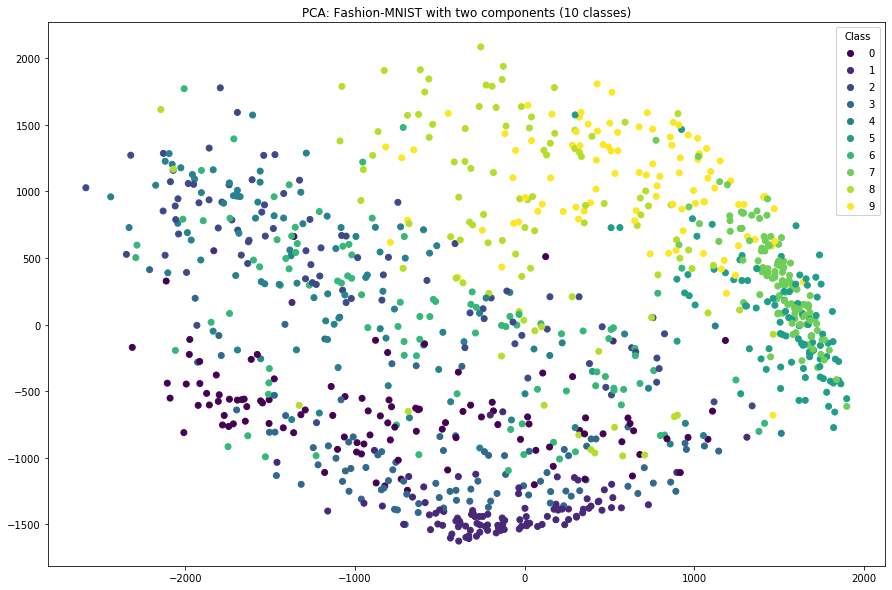

In [8]:
nr_datapoints = args.test_batch_size
u6.plot_PCA(train_loader, 'PCA: Fashion-MNIST with two components (10 classes)', nr_datapoints)


Repeat the <i>principal component analysis</i>, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$

Is the result of the <i>PCA</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does PCA work on them?

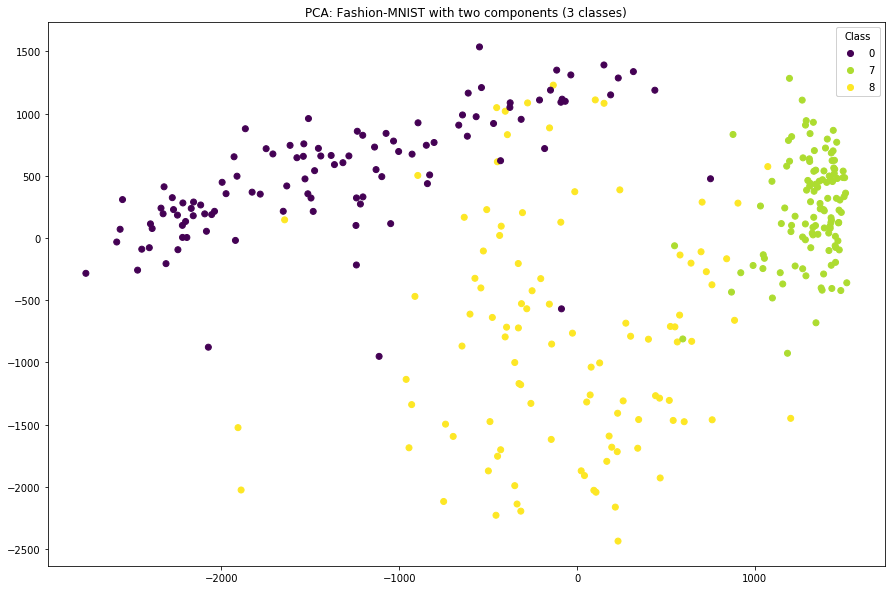

In [54]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,7,8])


Experiment with similar targets: 

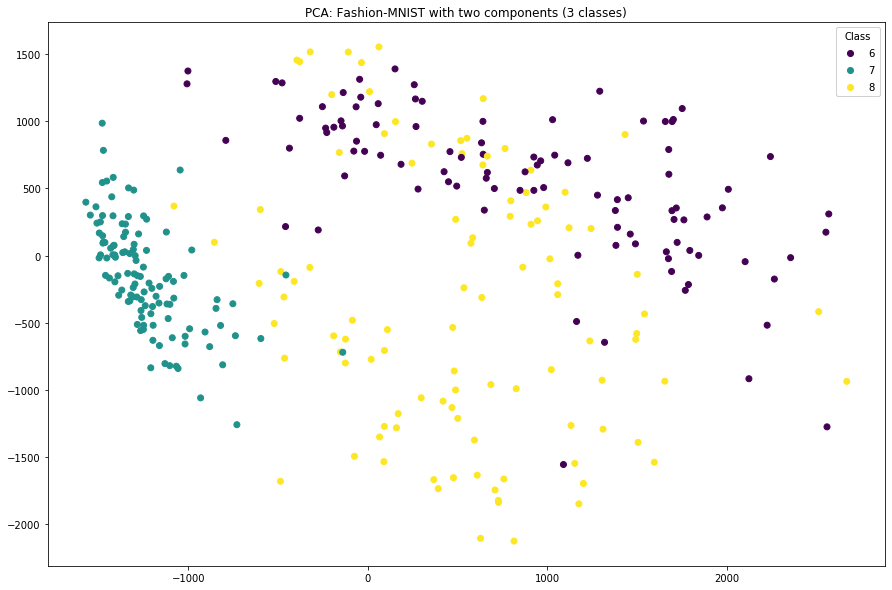

In [55]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [6,7,8])


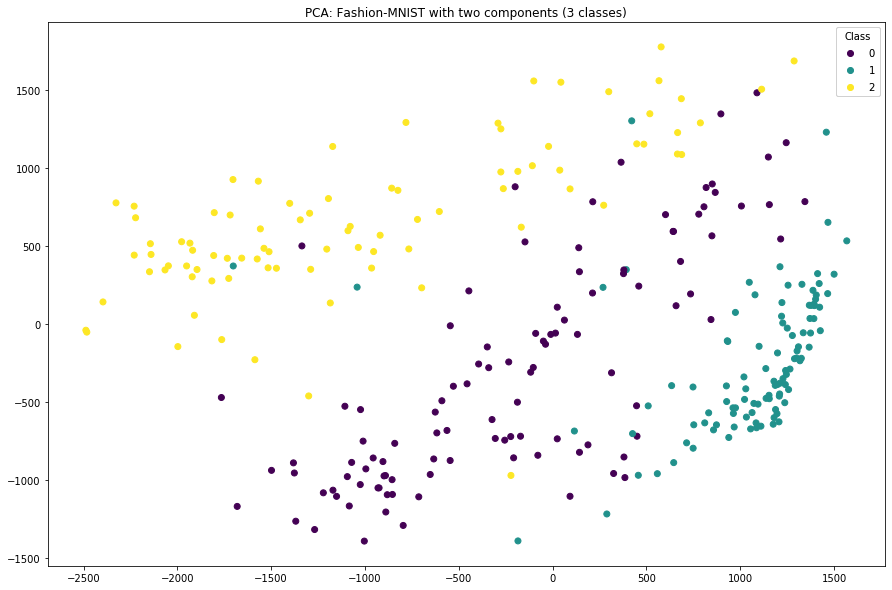

In [56]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,1,2])


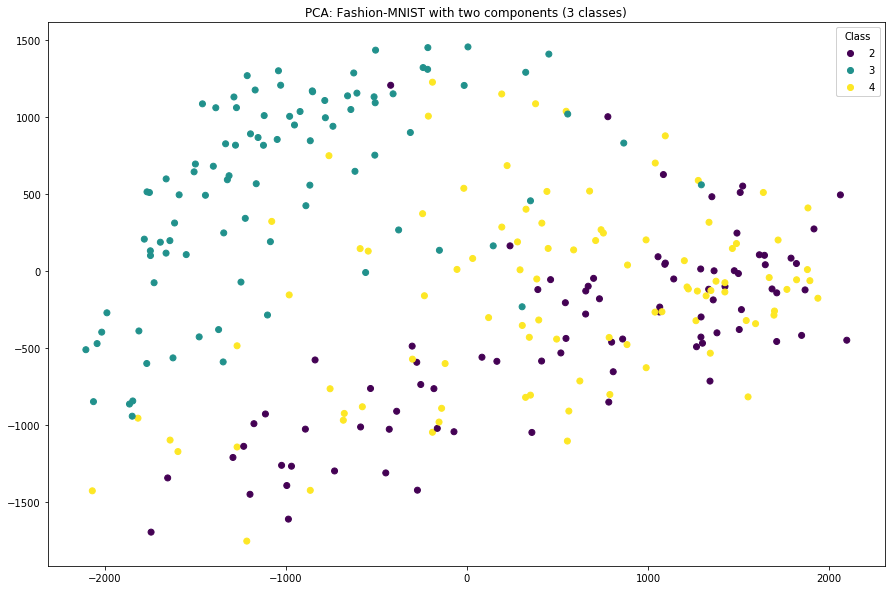

In [57]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [2,3,4])


Experiment with different targets:

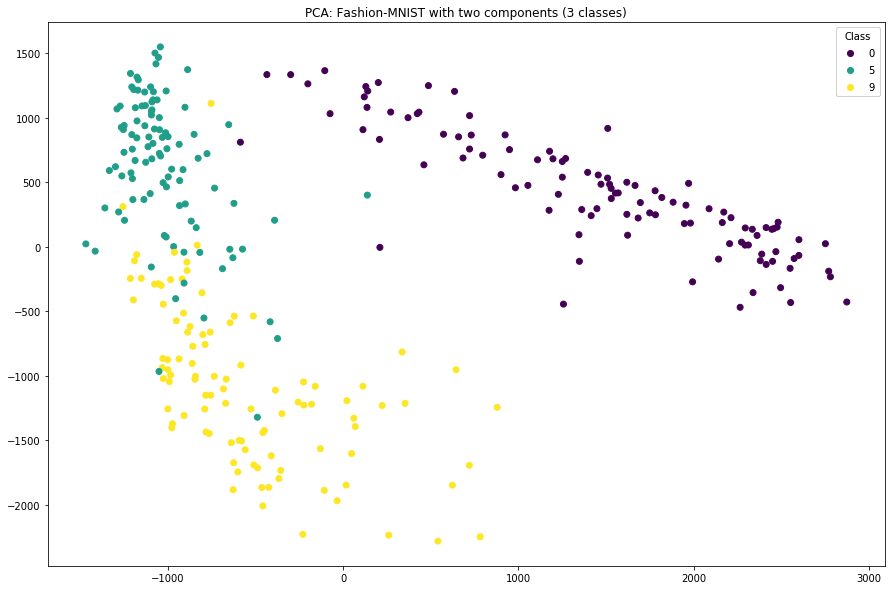

In [58]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,5,9])

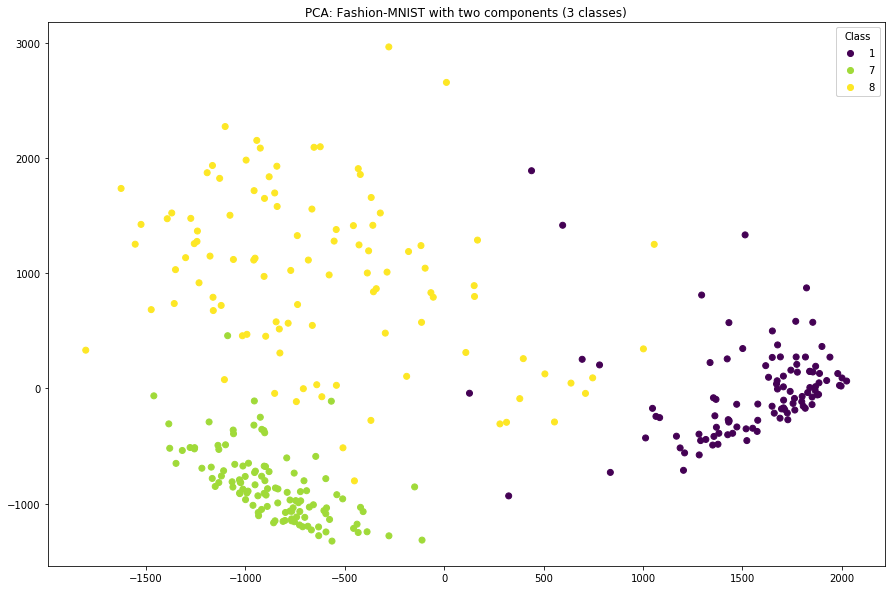

In [59]:
u6.plot_PCA_reduced(train_loader, 'PCA: Fashion-MNIST with two components (3 classes)', nr_datapoints, [1,7,8])

Targets that are more or less far away from each other (0,7,8)(0,5,9)(1,7,8): It seems to me that the separation is at most a little bit better. However I don't see a eye-catching difference. 


Targets that are close to each other (6,7,8)(0,1,2)(2,3,4): Here the PCA seems to lead to a better distinction. 
However, I have problems to distinguish between the colors in the scatter plot with the nine classes. 

<i>Principal component analysis</i> is not the only dimensionality reduction technique presented in this course, so to extend the <b>second task</b> of this exercise, further recall your knowledge about this topic (or have a glimpse at the notebooks of the lecture) and perform the following steps:

- Set the <i>random seed</i> to $s = 42$ using the <i>numpy</i> interface.
- Apply <i>t-SNE</i> on the first $n = 1000$ entries and project the Fashion-MNIST data set down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: the latter two steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

In [110]:
X_np = np.random.seed(42)


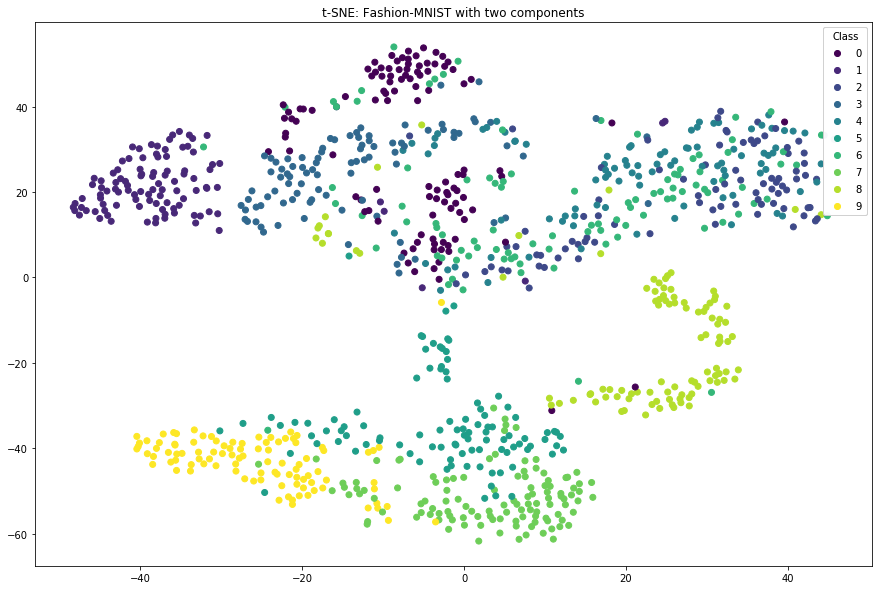

In [111]:
nr_datapoints = args.test_batch_size
u6.plot_tsne(train_loader, 't-SNE: Fashion-MNIST with two components', nr_datapoints)


Repeat the <i>t-distributed stochastic neighbor embedding</i> approach, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$


Keep in mind to <i>reset</i> the seed as described above!

Is the result of <i>t-SNE</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does t-SNE work on them? Compare your results with the respective counterparts of the PCA projection.

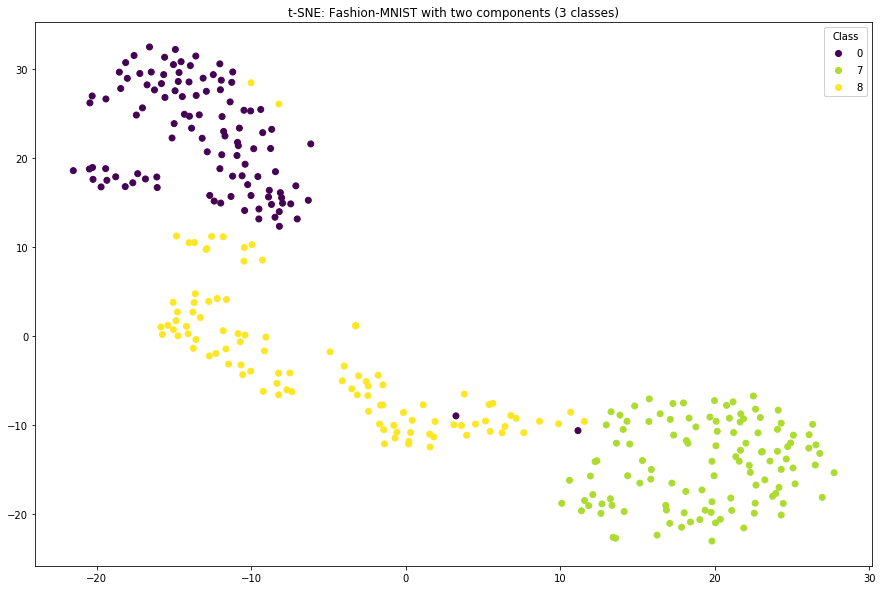

In [112]:
del X_np
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,7,8])


Experiment with similar targets:

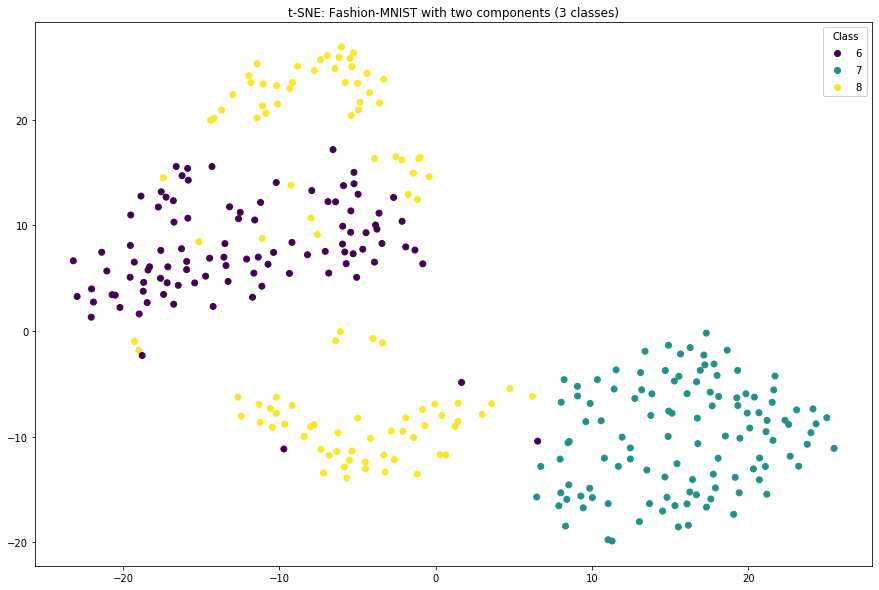

In [113]:
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [6,7,8])


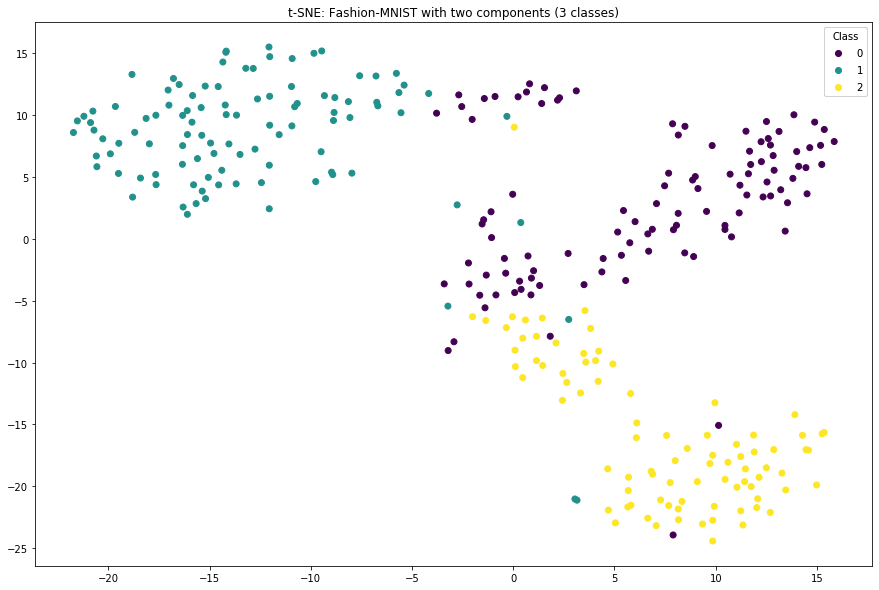

In [114]:
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,1,2])


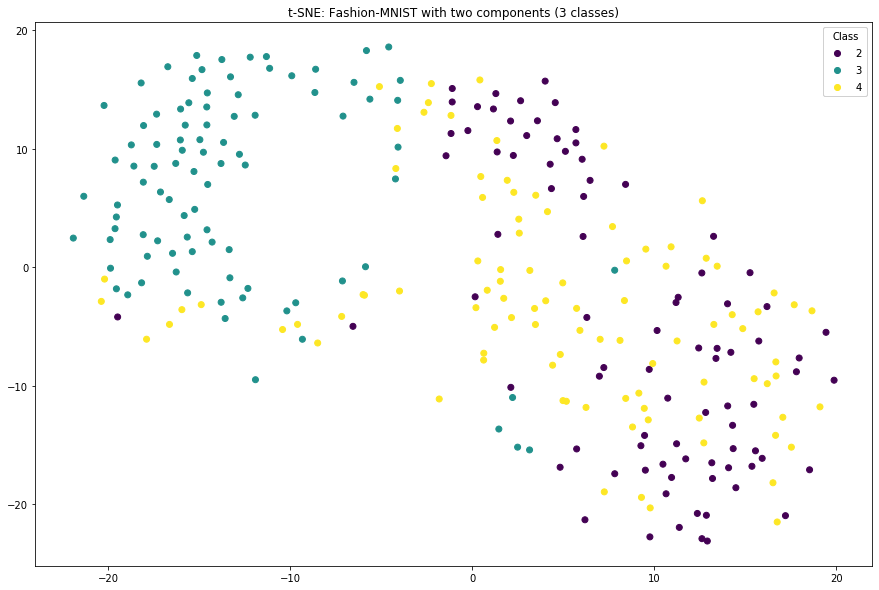

In [115]:
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [2,3,4])


Experiement with different targets:

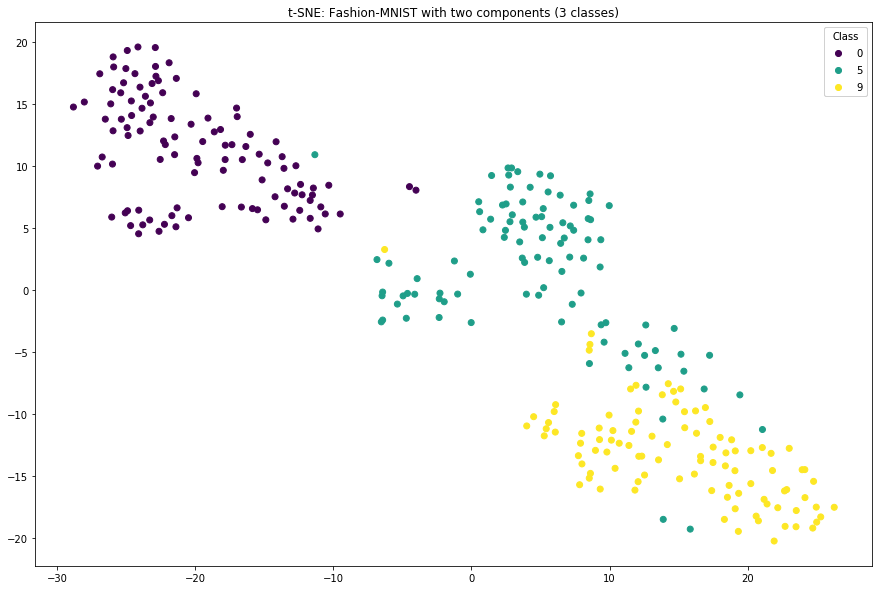

In [116]:
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [0,5,9])


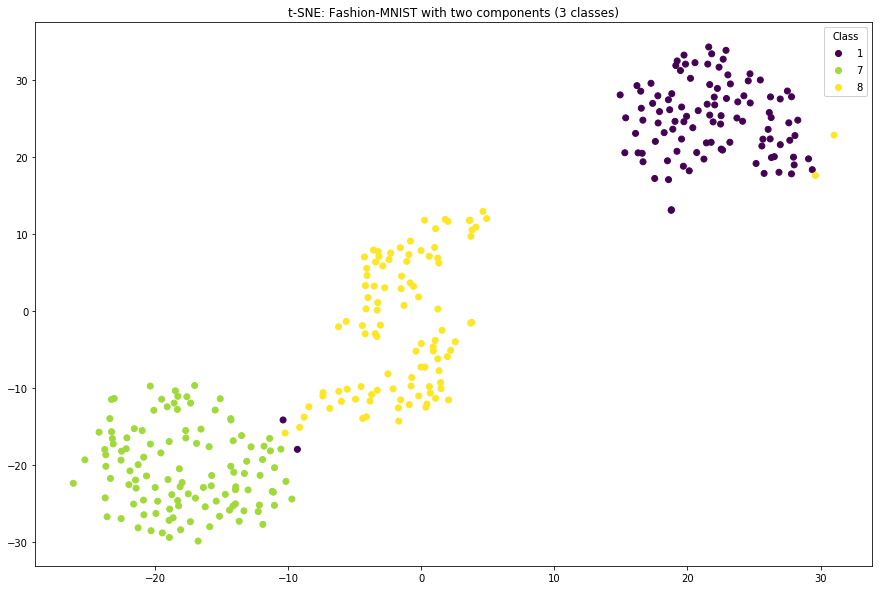

In [117]:
u6.plot_tsne_reduced(train_loader, 't-SNE: Fashion-MNIST with two components (3 classes)', nr_datapoints, [1,7,8])


Targets that are more or less far away from each other (0,7,8)(0,5,9)(1,7,8): I have the impression that the separations with only 3 classes aren't significantly better than the separation of the plot with 9 classes.


Targets that are close to each other (6,7,8)(0,1,2)(2,3,4): I think that for (0,1,2) the plot with 9 classes separates better. However, in (6,7,8) it seems that the 6 and 7 are better separated than in the plot with 9 classes. Besides that, in (2,3,4) the 3 seems to be better separated from the classes 2 and 4 than in the plot with 9 classes. 


Excepting of (0,5,9), in which the t-SNE has tighter clusters but doesn't separate better than PCA, in all cases t-SNE spearated the classes better than PCA. Even in the scatter plot with the 9 classes t-SNE separates the classes from each other better than PCA.

# Exercise 2
After recalling <i>two</i> most famous dimensionality reduction techniques

- principal component analysis (PCA)
- t-distributed stochastic neighbor embedding (t-SNE)

we want to investigate a third method, this time based on <i>neural networks</i> (which enables us a more fine-grained control over the <i>compression</i> phase). Moreover, as the family of the models of interest are of a <i>generative</i> nature, we can actually utilize them to <i>generate</i> new (related) samples. To get you started, the <b>first task</b> of this exercise requires you to perform the following steps:

- Set the dimensionality of the latent space to be $d_{h} = 10$.
- Define an <code>autoencoder</code> instance (supplied by <code>u6_utils.py</code>) using previously defined input dimensionality $d_{in}$.
- Define an <code>Adam</code> instance using previously defined <i>hyperparameters</i>.

Train the newly defined <i>autoencoder</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Experiment with <i>different</i> values for $d_{h}$ and report their performances on the <i>test set</i> afterwards.

In [9]:
hidden_dim = 10


In [11]:
device = torch.device('cuda' if use_cuda else 'cpu')
model_used = u6.autoencoder(input_dim, hidden_dim).to(device)
optimizer = torch.optim.Adam(model_used.parameters(), lr=args.lr, weight_decay=args.weight_decay)


In [12]:
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model_used, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model_used, device, test_loader, input_dim)
    

Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.364705
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.319800
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.328725
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.317820
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.328600
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.307090
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.310978
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.322117
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.310610
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.288962

Test set loss: 0.3106
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.309380
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.332685
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.311703
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.302270
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.302189
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.306536
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.327679
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.303703
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.311221
Train Epo

In [71]:
hidden_dim3 = 1
model = u6.autoencoder(input_dim, hidden_dim3).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model, device, test_loader, input_dim)


Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.496507
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.497265
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.499464
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.488953
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.481325
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.482828
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.486438
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.488710
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.508989
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.493985

Test set loss: 0.4913
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.502695
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.503438
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.501146
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.490228
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.499934
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.467715
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.478613
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.494190
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.495245
Train Epo

In [72]:
hidden_dim4 = 3
model = u6.autoencoder(input_dim, hidden_dim4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model, device, test_loader, input_dim)


Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.369030
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.409243
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.357023
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.324851
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.341257
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.339979
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.360528
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.328243
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.341067
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.338995

Test set loss: 0.3504
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.334710
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.359308
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.348266
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.339225
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.357617
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.359231
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.349864
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.359383
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.342904
Train Epo

In [73]:
hidden_dim5 = 5
model = u6.autoencoder(input_dim, hidden_dim5).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model, device, test_loader, input_dim)


Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.387076
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.342000
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.320526
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.299996
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.317381
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.284905
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.304882
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.314667
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.304824
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.328960

Test set loss: 0.3133
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.324303
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.318121
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.320219
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.299387
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.302073
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.295578
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.294924
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.308190
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.315400
Train Epo

In [74]:
hidden_dim6 = 15
model = u6.autoencoder(input_dim, hidden_dim6).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model, device, test_loader, input_dim)


Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.371654
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.331964
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.321912
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.327214
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.311807
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.328862
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.304045
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.297502
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.290352
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.295693

Test set loss: 0.3006
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.313903
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.289638
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.302186
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.275503
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.294145
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.293310
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.309488
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.275547
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.287665
Train Epo

In [75]:
hidden_dim7 = 20
model = u6.autoencoder(input_dim, hidden_dim7).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_autoencoder(args, model, device, train_loader, input_dim, optimizer, epoch)
    u6.test_autoencoder(args, model, device, test_loader, input_dim)


Train Epoch: 01 [6400/60000 (11%)]	Loss: 0.354172
Train Epoch: 01 [12800/60000 (21%)]	Loss: 0.343197
Train Epoch: 01 [19200/60000 (32%)]	Loss: 0.315725
Train Epoch: 01 [25600/60000 (43%)]	Loss: 0.312547
Train Epoch: 01 [32000/60000 (53%)]	Loss: 0.322494
Train Epoch: 01 [38400/60000 (64%)]	Loss: 0.292445
Train Epoch: 01 [44800/60000 (75%)]	Loss: 0.298652
Train Epoch: 01 [51200/60000 (85%)]	Loss: 0.303266
Train Epoch: 01 [57600/60000 (96%)]	Loss: 0.291638
Train Epoch: 01 [60000/60000 (100%)]	Loss: 0.333937

Test set loss: 0.3019
Train Epoch: 02 [6400/60000 (11%)]	Loss: 0.312924
Train Epoch: 02 [12800/60000 (21%)]	Loss: 0.295724
Train Epoch: 02 [19200/60000 (32%)]	Loss: 0.319473
Train Epoch: 02 [25600/60000 (43%)]	Loss: 0.300270
Train Epoch: 02 [32000/60000 (53%)]	Loss: 0.292448
Train Epoch: 02 [38400/60000 (64%)]	Loss: 0.290049
Train Epoch: 02 [44800/60000 (75%)]	Loss: 0.301089
Train Epoch: 02 [51200/60000 (85%)]	Loss: 0.283798
Train Epoch: 02 [57600/60000 (96%)]	Loss: 0.284675
Train Epo

The performance related to the dimensionality of the latent space. <br>
Hidden layer | Test set loss <br>
1 | 0.4917 <br>
3 | 0.3203 <br>
5 | 0.3035 <br>
10| 0.2981 <br>
15| 0.2878 <br>
20| 0.2868 <br>

--> You can observe the tendency that the higher the dimensionality of the latent space is, the less is the test set loss. 

In the previous exercise, PCA was applied on the <i>input space</i> of the Fashion-MNIST data set. As an <i>autoencoder</i> model was trained in the meantime, it would be interesting and eventually insightful to analyze the <i>hidden</i> or <i>latent representation</i> of said data set with respect to a distinction between the corresponding <i>targets/classes</i>. The <b>first task</b> of this exercise consists of the following steps:

- Apply <i>PCA</i> on the <i>latent representation</i> of the first $n = 1000$ entries and project them down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: both steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

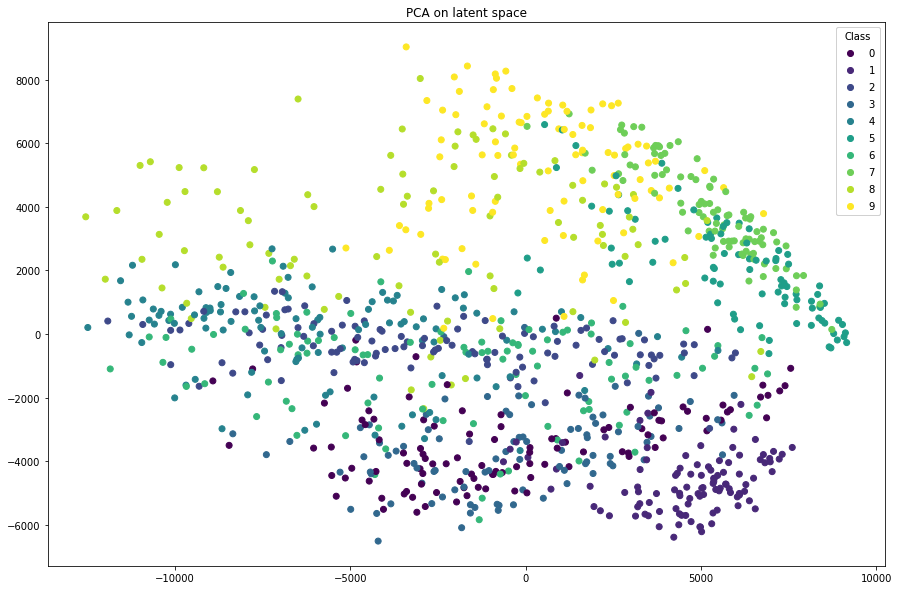

In [14]:
u6.plot_PCA_hidden(model_used, test_loader, device, input_dim, 'PCA on latent space', args.test_batch_size)


Repeat the <i>principal component analysis</i>, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$

Is the result of the <i>PCA</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does PCA work on them? Can you spot any differences when compared to PCA applied on the <i>input space</i> of the data set (instead of the <i>latent space</i>)? Try to comment on you answer, but keep in mind, to compare the <i>same subset</i> of <i>targets</i>.

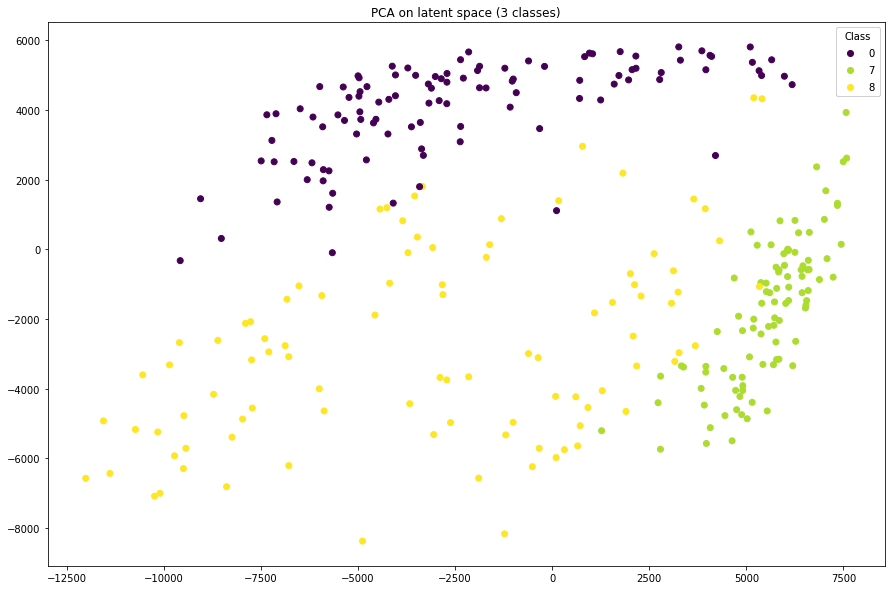

In [27]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [0,7,8])


Experiment with similar targets:

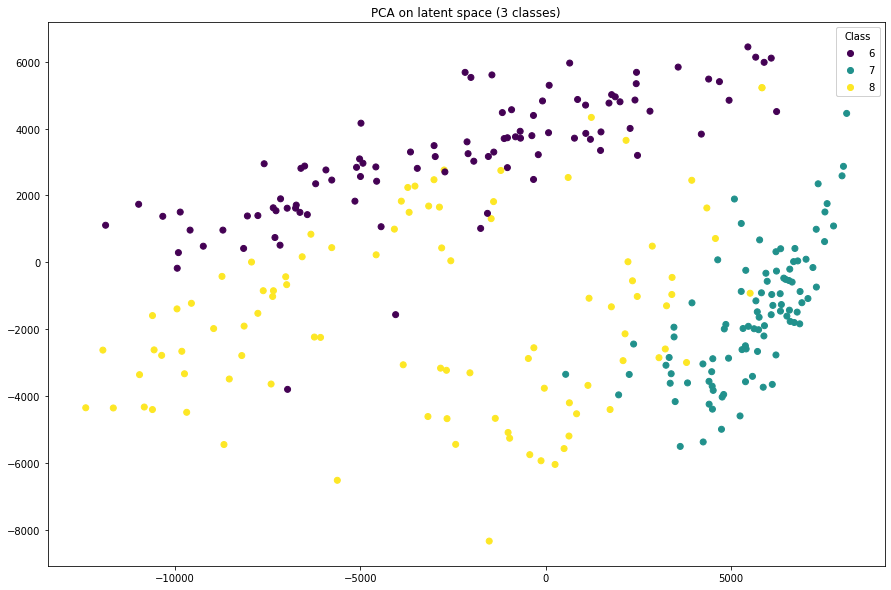

In [28]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [6,7,8])


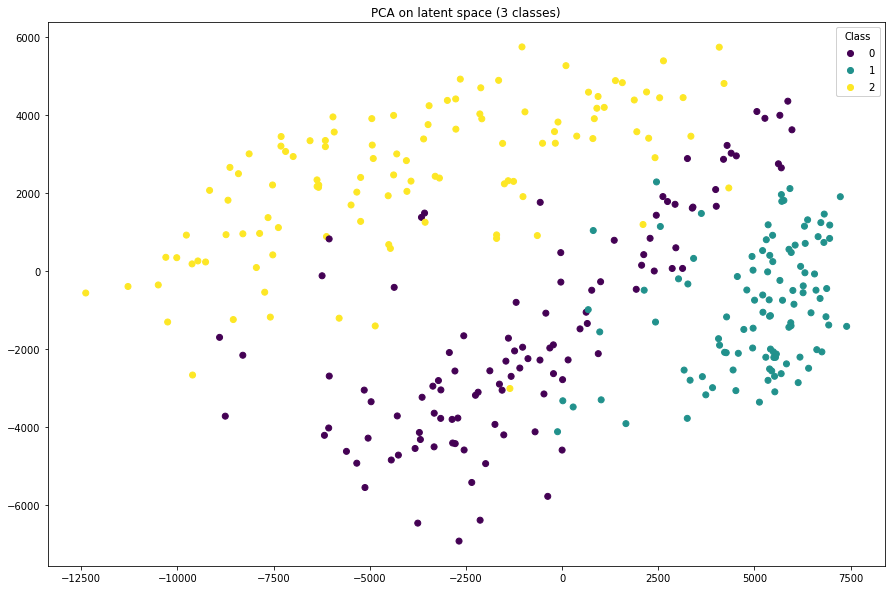

In [29]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [0,1,2])


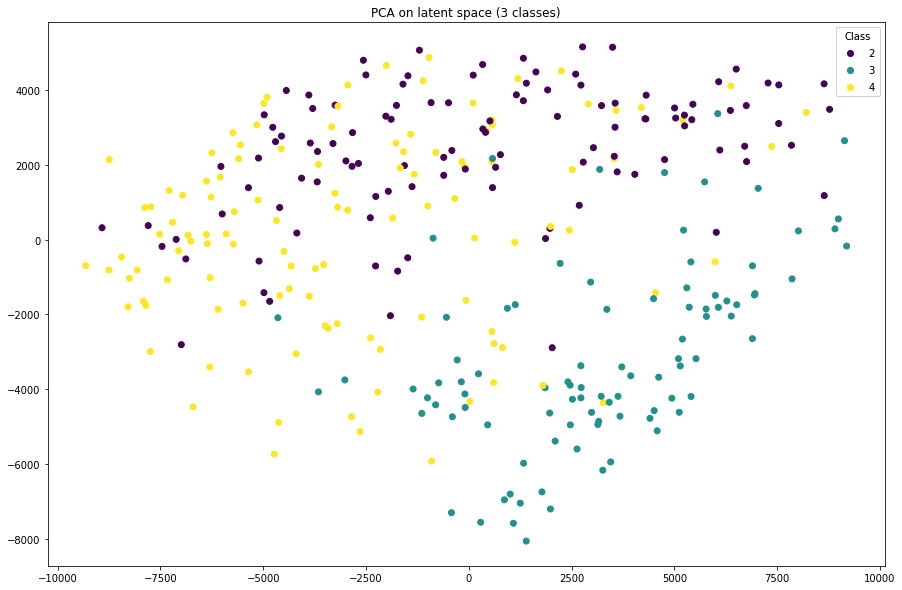

In [33]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [2,3,4])


Experiment with different targets:

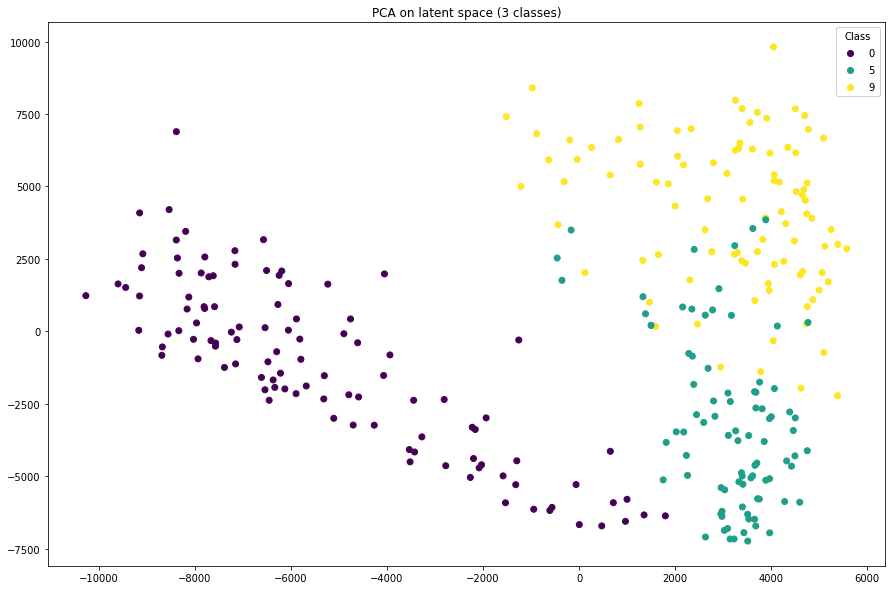

In [31]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [0,5,9])


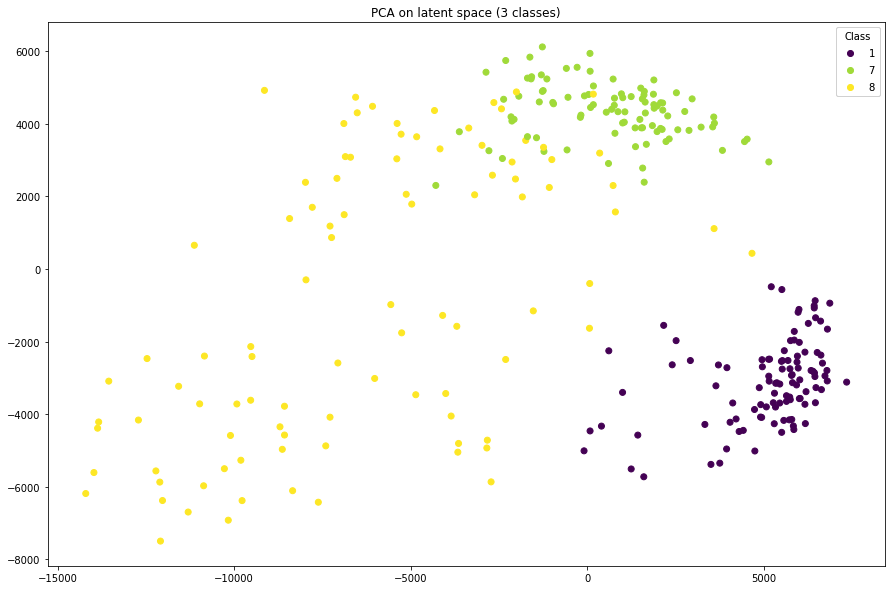

In [32]:
u6.plot_PCA_hidden_reduced(model_used, test_loader, device, input_dim, 'PCA on latent space (3 classes)', args.test_batch_size, [1,7,8])


Targets that are close to each other (6,7,8)(0,1,2)(2,3,4): I think that PCA doesn't separate the samples perfectly. For (6,7,8) you can observe a separation between 6 and 7 but 8 spreads widely and overlaps with the other classes. In (0,1,2) are overlaps between 0 and 1 but apart from this there is a good separation. (2,3,4): Here you can only oberserve a bad separation, especially for 2 and 4. 

Targets that are more or less far away from each other (0,7,8)(0,5,9)(1,7,8): Also here, the sparation isn't satisfactory. The class 8 spreads very widely/isn't well clustered. 0,7,8: The separation between 0 and 7 is okay, but not for 7,8. 0,5,9: The separations between 0,5 and also between 0,9 are okay, but the separtion between 5,9 doesn't work well. 1,7,8: In that case the class 1 is well separated from the remaining two classes. However, 7 and 8 are overlapped. 

PCA applied on the input space of the data set (instead of the latent space)? Try to comment on you answer, but keep in mind, to compare the same subset of targets.

There aren't big differences between the PCA on the input space and the PCA of latent space. They separate very similarly. In the case of (1,7,8) I could oberserve, that PCA on the input space seems to build tighter clusters. 



The results of the two dimensionality reduction techniques, <i>principal component analysis</i> and <i>t-distributed neighbor embedding</i>, might vary a lot. Hence, your <b>second task</b> of this exercise comprises the analysis of the <i>latent space</i> of some Fashion-MNIST entries using <i>t-SNE</i>.

- Set the <i>random seed</i> to $s = 42$ using the <i>numpy</i> interface.
- Apply <i>t-SNE</i> on the <i>latent representation</i> of the first $n = 1000$ entries and project them down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: the latter two steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

In [34]:
X_two = np.random.seed(42)


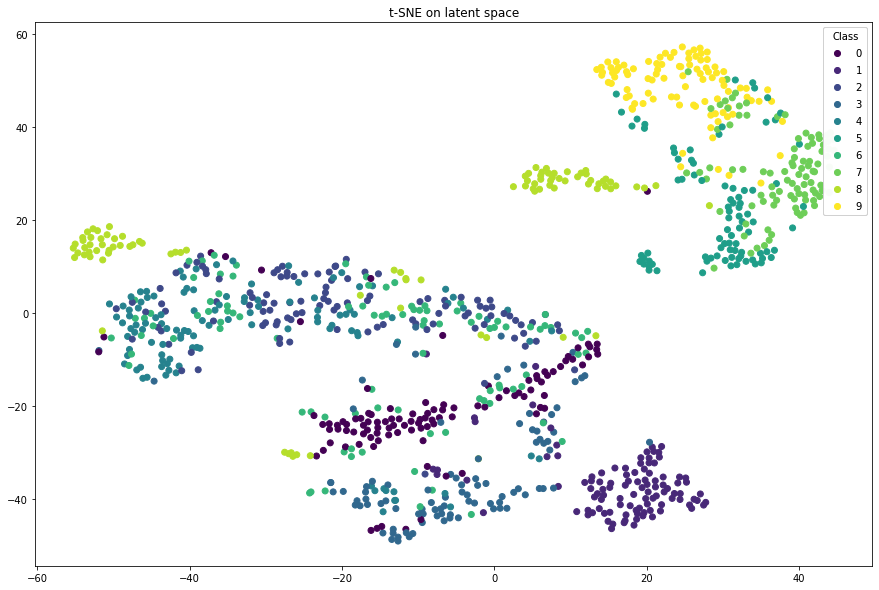

In [37]:
u6.plot_tsne_hidden(model_used, test_loader, device, input_dim, 't-SNE on latent space', args.test_batch_size)

Repeat the <i>t-distributed stochastic neighbor embedding</i> approach, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$

Is the result of the <i>t-SNE</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does t-SNE work on them? Can you spot any differences when compared to t-SNE applied on the <i>input space</i> of the data set (instead of the <i>latent space</i>)? Try to comment on you answer, but keep in mind, to compare the <i>same subset</i> of <i>targets</i>.

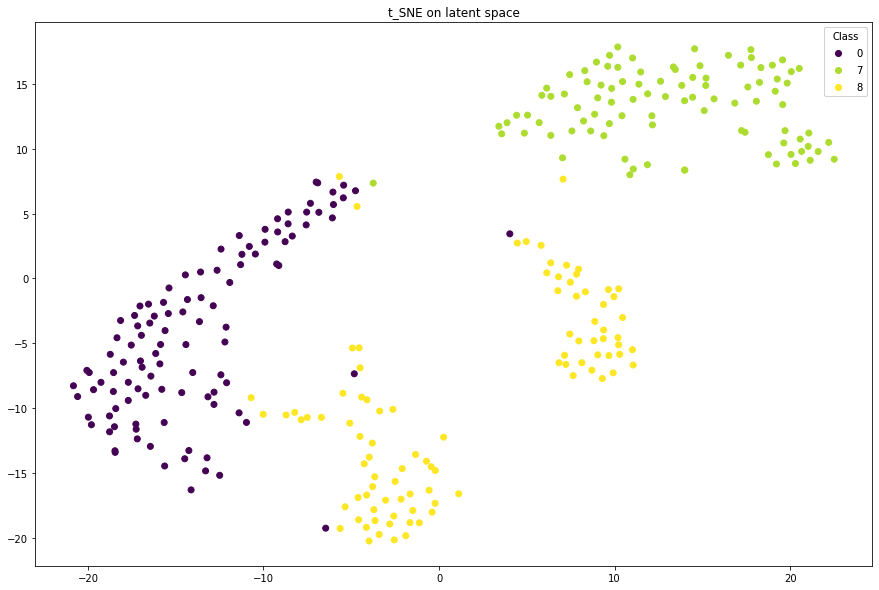

In [38]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,7,8])


Experiment with similar targets:

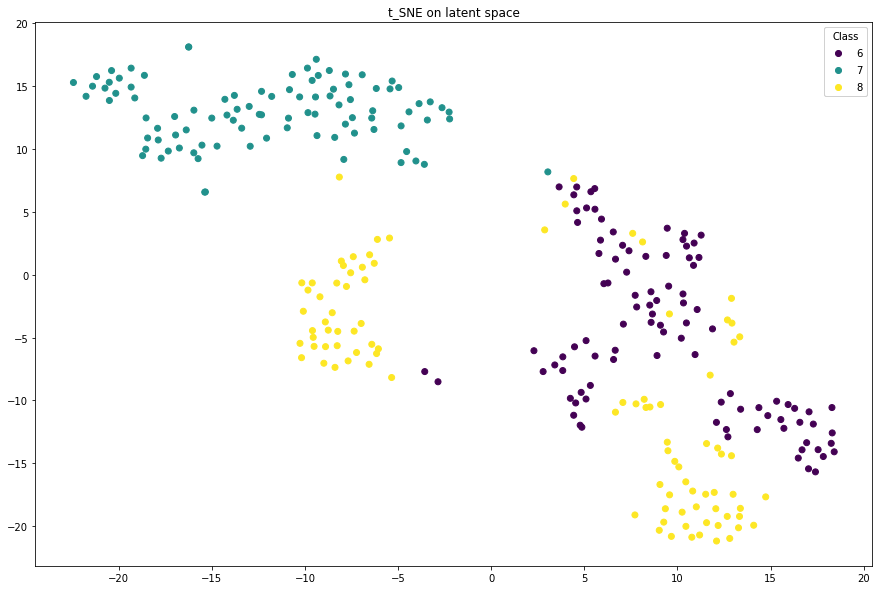

In [39]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [6,7,8])


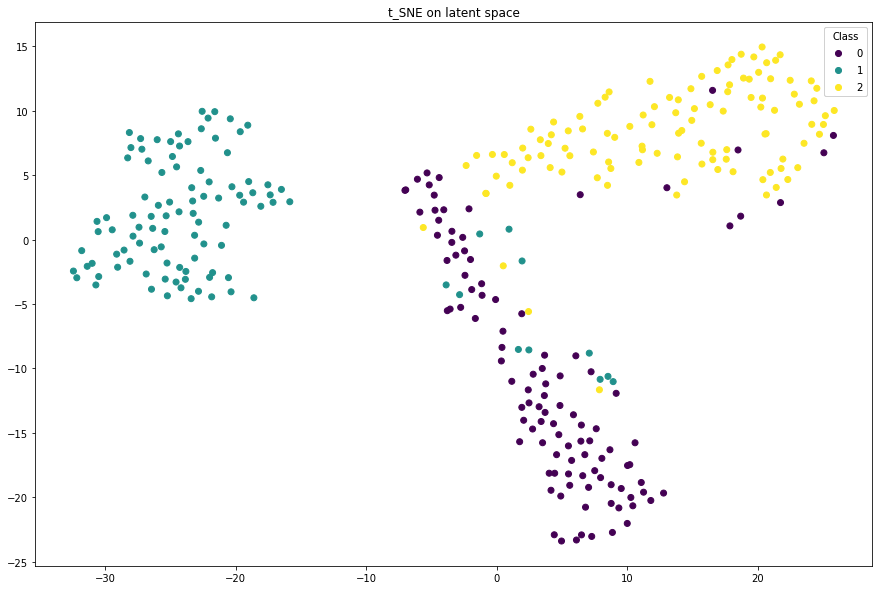

In [40]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,1,2])


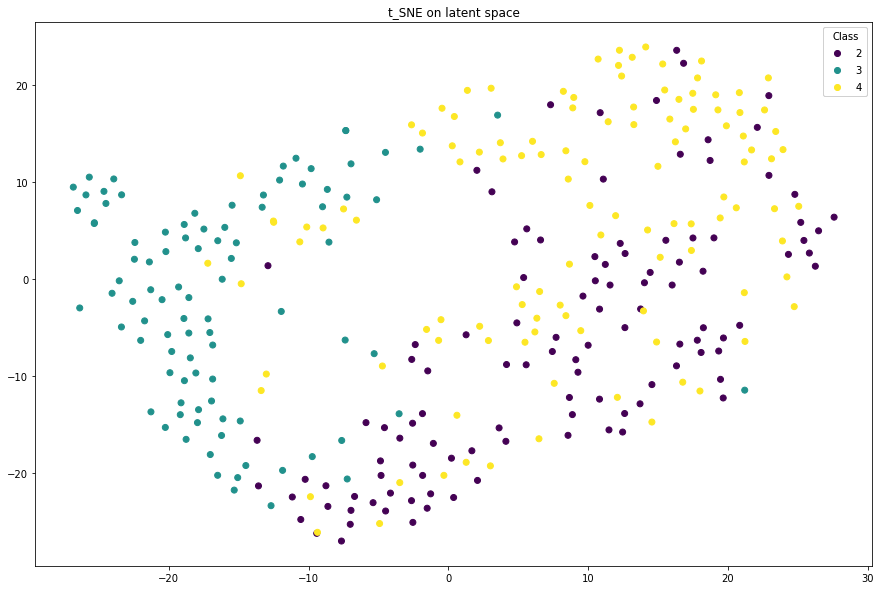

In [41]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [2,3,4])


Experiment with different targets:

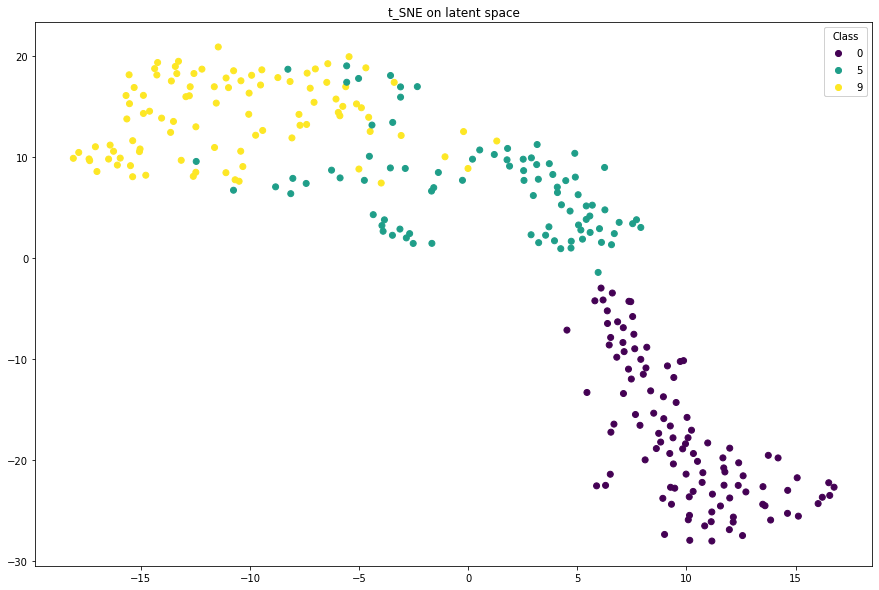

In [42]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,5,9])


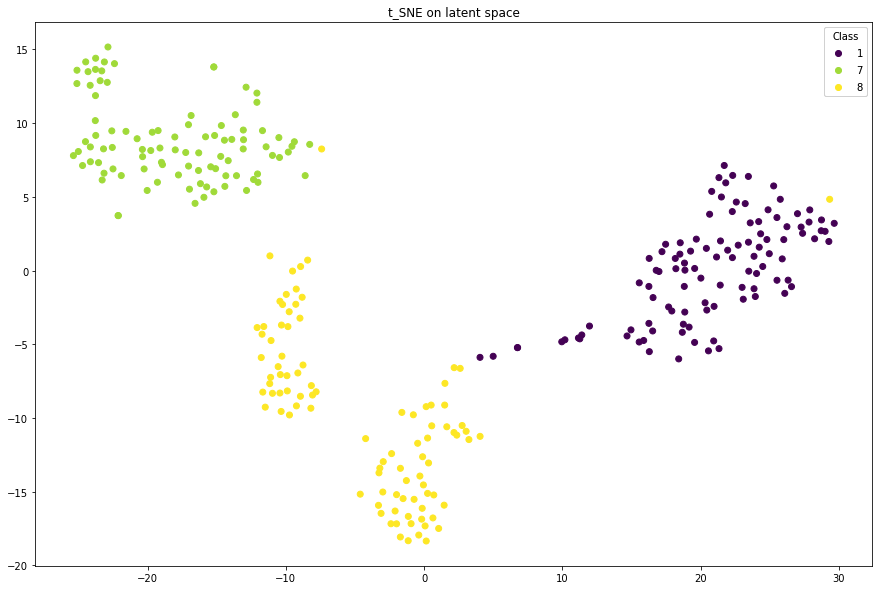

In [43]:
u6.plot_tsne_hidden_reduced(model_used, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [1,7,8])


Targets that are close to each other (6,7,8)(0,1,2)(2,3,4): (6,7,8): 6 and 7 are separated well. The class 8 is widely distributed and can also be found in the territory of 6. (0,1,2): Here, you can find runaways from 0 and 1. However, the rest is nicely separated. (2,3,4): Here is a bad separation, because 2 and 4 strongly overlaps each other.<br>
By similar target you can observe a good separation which has also its weak points.

Targets that are more or less far away from each other (0,7,8)(0,5,9)(1,7,8): (0,5,9): 0 is separated very well. The classes 5 and 9 overlap but altogehter are separated. (1,7,8): Here, you can see a nice separation. (0,7,8): Class 8 has two clusters. Nevertheless, it is nicely separated. <br>
Separation for targets which differentiate in their features is of course more easy. The separations was successful.

There aren't striking differences in the performances between the t-SNE of input space and the t-SNE on latent space. Only for (0,1,2) you can observe that the classes of t-SNE are more widely spread thant for t-SNE on the latent space.

Reducing the dimensionality and plotting the result is not the only interesting analysis of a <i>hidden representation</i> of some data entries. Especially fascinating is the possibility to <i>walk</i> in the <i>latent space</i> from <i>one</i> data point to <i>another</i>. The <b>third</b> and <b>last task</b> of this exercise requires you to explore the <i>latent space</i> of the trained <i>autoencoder</i> model.

- Create a <i>subdirectory</i> termed <code>samples</code> in the current working directory.
- Fetch the <i>next</i> batch of the data loader connected to the <i>training</i> set.
- Apply the trained <i>autoencoder</i> model to said batch.

Now it would be interesting to actually <i>see</i> the result of the <i>decoding</i> step of the <i>autoencoder</i>. Therefore:

- Save the <i>decoded</i> latent representation to <code>./samples/x_ae_decoded.png</code> (keep in mind to <i>reshape</i> the tensor accordingly).
- Read and <i>display</i> the just created file (<i>hint</i>: have a look at the notebook presented during the <i>lecture</i>).

In [28]:
if not os.path.exists(os.path.join(r'.', r'samples')):
    os.makedirs(os.path.join(r'.', r'samples'))
    

In [15]:
data, _ = next(iter(train_loader))
data = data.view(-1, input_dim)
data = data.to(device)
hidden, output = model_used(data)


In [17]:
u6.save_image(output.data.view(args.batch_size, 1, 28, 28), './samples/x_ae_decoded.png')


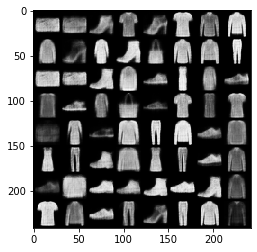

In [18]:
saved_pic = mpimg.imread('./samples/x_ae_decoded.png')
plt.imshow(saved_pic)


Choose <i>two</i> decoded entries of the previous image using the following <i>indexing</i> of an <i>entry</i> (note, that the index is computed <i>row-wise</i>):

\begin{equation}
    e_{i} = j_{row} \cdot{} d_{row} + j_{column}
\end{equation}

Whereas the single parts refer to:

- $e_{i}$ corresponds to the <i>i-th</i> entry.
- $d_{row}$ defines the amount of <i>entries</i> per row.
- $j_{row}$ specifies the <i>row</i> index (zero-based).
- $j_{column}$ specifies the <i>column</i> index (zero-based).

Plot both <i>chosen</i> entries using this notation to verify the <i>correct</i> indexing of your choices.

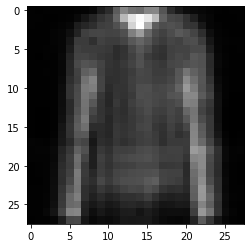

In [63]:
# First choice: last element, sweater, last line, last row
first_c = 8*7 + 7
u6.plot_example(output, first_c)


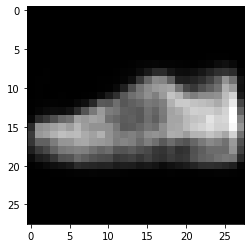

In [64]:
# Second choice: third row, last element, shoe
second_c = 8*2 + 7
u6.plot_example(output, second_c)


Now comes the fun part: the actual <i>walk</i> in the <i>latent space</i>. For this very purpose, the following steps are required:

- Walk in the latent space using the <code>walk_in_latent_space</code> method of <code>u6_utils.py</code> (save the result in <code>x_ae_walk.png</code>).
- Read and <i>display</i> the just created file (keep in mind, that the result of the previous step is saved in the <code>samples</code> subdirectory).

Experiment with different <i>entries</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

Try to comment on the <i>transition</i> phase. Are some targets <i>more</i> suited to be transitioned into each other than others? Try to argue about <i>possible</i> reasons.

In [65]:
u6.walk_in_latent_space(model_used, hidden, first_c, second_c, args.batch_size, hidden_dim, device, "x_ae_walk.png")


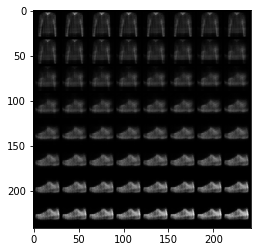

In [66]:
img_ae_walk = mpimg.imread('./samples/x_ae_walk.png')
plt.imshow(img_ae_walk)


Similar elements:

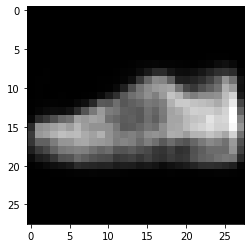

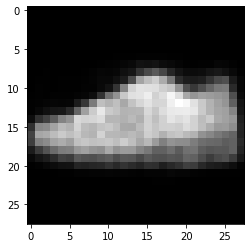

In [67]:
element_1 = 8*2 + 7
u6.plot_example(output, element_1)
element_2 = 8*4 + 6
u6.plot_example(output, element_2)


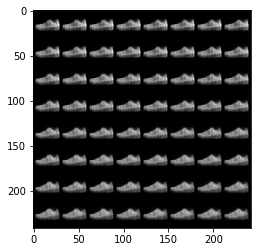

In [68]:
u6.walk_in_latent_space(model_used, hidden, element_1, element_2, args.batch_size, hidden_dim, device, "x_ae_walk_similar_1.png")
img_ae_walk = mpimg.imread('./samples/x_ae_walk_similar_1.png')
plt.imshow(img_ae_walk)


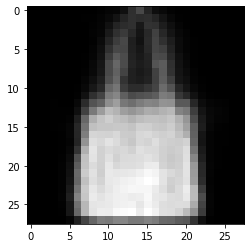

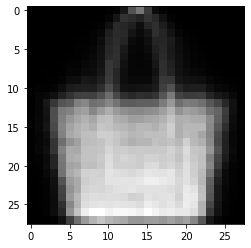

In [69]:
element_3 = 8*1 + 4
u6.plot_example(output, element_3)
element_4 = 8*3 + 3
u6.plot_example(output, element_4)


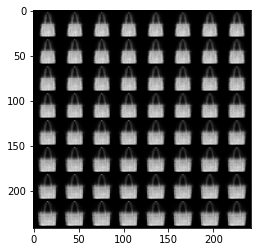

In [70]:
u6.walk_in_latent_space(model_used, hidden, element_3, element_4, args.batch_size, hidden_dim, device, "x_ae_walk_similar_2.png")
img_ae_walk = mpimg.imread('./samples/x_ae_walk_similar_2.png')
plt.imshow(img_ae_walk)


Different elements:

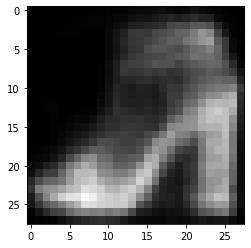

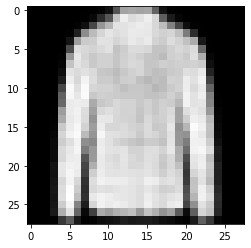

In [71]:
element_5 = 8*1 + 1
u6.plot_example(output, element_5)
element_6 = 8*7 + 6
u6.plot_example(output, element_6)


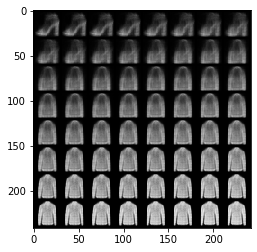

In [72]:
u6.walk_in_latent_space(model_used, hidden, element_5, element_6, args.batch_size, hidden_dim, device, "x_ae_walk_different_1.png")
img_ae_walk = mpimg.imread('./samples/x_ae_walk_different_1.png')
plt.imshow(img_ae_walk)


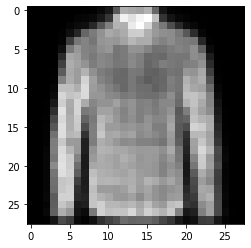

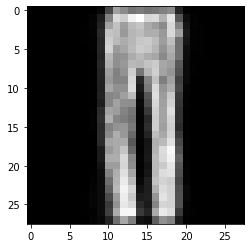

In [74]:
element_7 = 8*0 + 6
u6.plot_example(output, element_7)
element_8 = 8*5 + 1
u6.plot_example(output, element_8)


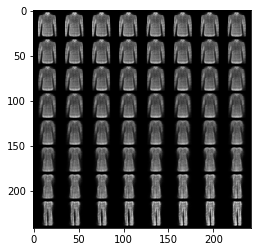

In [75]:
u6.walk_in_latent_space(model_used, hidden, element_7, element_8, args.batch_size, hidden_dim, device, "x_ae_walk_different_2.png")
img_ae_walk = mpimg.imread('./samples/x_ae_walk_different_2.png')
plt.imshow(img_ae_walk)


Obviously, the walk in the latent space for similar targets isn't drastic. It looks logical to transfrom one shoe with shadows to a bright white shoe. <br>
For differentiated elements you can oberserve interesting transitions. For instance, we want to transform a sweater into trousers. The sweater first transfroms to dresses with long and short sleeves. These transform to trousers. So, you can see that more cases of different classes are covered. 


At the beginning of <i>this</i> exercise, the following statement was boldly claimed:

<cite>Moreover, as the family of the models of interest are of a <i>generative</i> nature, we can actually utilize them to <i>generate</i> new (related) samples.</cite>

But up until now, no <i>new</i> real content was produced. The previous <i>walk</i> in the <i>latent space</i> is a step in the right direction, but still <i>not</i> what said statement seemed to <i>promise</i>. Now is the time to <i>change</i> that:

- Create a <i>random</i> <code>Variable</code> of size $d_{batch} \times{} d_{h}$.
- Use the <code>decoder</code> member of the <i>autoencoder</i> model to process the just created <i>random variable</i>.
- Save the <i>decoded</i> random representation to <code>./samples/x_ae_random.png</code> (keep in mind to <i>reshape</i> the tensor accordingly).
- Read and <i>display</i> the just created file (<i>hint</i>: have a look at the notebook presented during the lecture).

What do you observe? Those <i>newly</i> created images are <i>nice</i> and <i>beautiful</i>, aren't they? If <i>not</i>, try to comment on <i>possible</i> reasons.

In [67]:
sample = Variable(torch.randn(args.batch_size, hidden_dim)).to(device)
sample = model.decoder(sample).to(device)
save_image(sample.data.view(args.batch_size, 1, 28, 28),'./samples/x_ae_random.png')


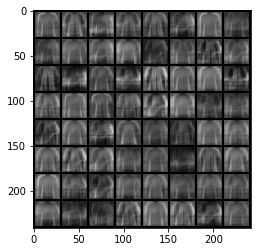

In [68]:
img_ae_random = mpimg.imread('./samples/x_ae_random.png')
plt.imshow(img_ae_random)


What do you observe? Those newly created images are nice and beautiful, aren't they? If not, try to comment on possible reasons. <dr>
   In my point of view, these picutres don't seem to be realistic anymore. It's good that there are different shadows in the pictures, that present the different realistic possibilities of lighting. Also, the different colors work well (e. g. light grey vs. dark grey). However, in some picutres is a strong fog that doesn't appear on photos of real clothes. 

# Exercise 3
After <i>experimenting</i> with <i>autoencoders</i> and <i>analyzing</i> the <i>latent space</i> of them, some problems might have arisen. Fortunately, there is a slight adaption of the <i>plain</i> autoencoder introducing a nice property with respect to <i>content creation</i> (more on this later in this exercise): <i>variational autoencoders</i>. To get you started, the <b>first task</b> of this exercise requires you to perform the following steps:

- Set the dimensionality of the latent space to be $d_{h} = 10$.
- Define a <code>VAE</code> instance (supplied by <code>u6_utils.py</code>) using previously defined input dimensionality $d_{in}$.
- Define an <code>Adam</code> instance using previously defined <i>hyperparameters</i>.

Train the newly defined <i>variational autoencoder</i> model by applying the corresponding <i>data loader</i> (keep in mind for which set we want the model to be <i>trained</i>) as well as the <i>optimizer</i>. Experiment with <i>different</i> values for $d_{h}$ and report their performances on the <i>test set</i> afterwards.

In [79]:
latent_dim = 10


In [80]:
modelvae = u6.VAE(input_dim, latent_dim).to(device)
optimizervae = torch.optim.Adam(modelvae.parameters(), lr=args.lr, weight_decay=args.weight_decay)


In [82]:
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae, device, train_loader, input_dim, optimizervae, epoch)
    u6.test_variational_autoencoder(args, modelvae, device, test_loader, input_dim)


Train Epoch: 1 [0/60000 (0%)]	Loss: 35120.566406
Train Epoch: 1 [6400/60000 (11%)]	Loss: 18971.308594
Train Epoch: 1 [12800/60000 (21%)]	Loss: 16371.050781
Train Epoch: 1 [19200/60000 (32%)]	Loss: 16947.083984
Train Epoch: 1 [25600/60000 (43%)]	Loss: 18898.759766
Train Epoch: 1 [32000/60000 (53%)]	Loss: 16827.371094
Train Epoch: 1 [38400/60000 (64%)]	Loss: 17032.242188
Train Epoch: 1 [44800/60000 (75%)]	Loss: 16893.332031
Train Epoch: 1 [51200/60000 (85%)]	Loss: 15864.451172
Train Epoch: 1 [57600/60000 (96%)]	Loss: 16533.900391

Test set loss: 252572.9438
Train Epoch: 2 [0/60000 (0%)]	Loss: 17816.707031
Train Epoch: 2 [6400/60000 (11%)]	Loss: 17550.927734
Train Epoch: 2 [12800/60000 (21%)]	Loss: 16230.803711
Train Epoch: 2 [19200/60000 (32%)]	Loss: 16753.138672
Train Epoch: 2 [25600/60000 (43%)]	Loss: 16104.328125
Train Epoch: 2 [32000/60000 (53%)]	Loss: 16167.742188
Train Epoch: 2 [38400/60000 (64%)]	Loss: 16409.695312
Train Epoch: 2 [44800/60000 (75%)]	Loss: 16207.027344
Train Epoch:

In [65]:
latent_dim1 = 1
modelvae1 = u6.VAE(input_dim, latent_dim1).to(device)
optimizervae1 = torch.optim.Adam(modelvae1.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae1, device, train_loader, input_dim, optimizervae1, epoch)
    u6.test_variational_autoencoder(args, modelvae1, device, test_loader, input_dim)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 35277.812500
Train Epoch: 1 [6400/60000 (11%)]	Loss: 21298.818359
Train Epoch: 1 [12800/60000 (21%)]	Loss: 21322.632812
Train Epoch: 1 [19200/60000 (32%)]	Loss: 20640.109375
Train Epoch: 1 [25600/60000 (43%)]	Loss: 19596.296875
Train Epoch: 1 [32000/60000 (53%)]	Loss: 19277.748047
Train Epoch: 1 [38400/60000 (64%)]	Loss: 19479.484375
Train Epoch: 1 [44800/60000 (75%)]	Loss: 21018.365234
Train Epoch: 1 [51200/60000 (85%)]	Loss: 20512.064453
Train Epoch: 1 [57600/60000 (96%)]	Loss: 19120.640625

Test set loss: 305060.9062
Train Epoch: 2 [0/60000 (0%)]	Loss: 18873.406250
Train Epoch: 2 [6400/60000 (11%)]	Loss: 19313.669922
Train Epoch: 2 [12800/60000 (21%)]	Loss: 18739.871094
Train Epoch: 2 [19200/60000 (32%)]	Loss: 20005.056641
Train Epoch: 2 [25600/60000 (43%)]	Loss: 18999.976562
Train Epoch: 2 [32000/60000 (53%)]	Loss: 19863.718750
Train Epoch: 2 [38400/60000 (64%)]	Loss: 19275.343750
Train Epoch: 2 [44800/60000 (75%)]	Loss: 19884.228516
Train Epoch:

In [67]:
latent_dim3 = 3
modelvae3 = u6.VAE(input_dim, latent_dim3).to(device)
optimizervae3 = torch.optim.Adam(modelvae3.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae3, device, train_loader, input_dim, optimizervae3, epoch)
    u6.test_variational_autoencoder(args, modelvae3, device, test_loader, input_dim)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 35138.132812
Train Epoch: 1 [6400/60000 (11%)]	Loss: 17459.005859
Train Epoch: 1 [12800/60000 (21%)]	Loss: 17366.410156
Train Epoch: 1 [19200/60000 (32%)]	Loss: 16980.417969
Train Epoch: 1 [25600/60000 (43%)]	Loss: 17930.414062
Train Epoch: 1 [32000/60000 (53%)]	Loss: 16569.412109
Train Epoch: 1 [38400/60000 (64%)]	Loss: 16124.103516
Train Epoch: 1 [44800/60000 (75%)]	Loss: 16746.710938
Train Epoch: 1 [51200/60000 (85%)]	Loss: 16876.765625
Train Epoch: 1 [57600/60000 (96%)]	Loss: 17040.310547

Test set loss: 261079.8141
Train Epoch: 2 [0/60000 (0%)]	Loss: 16844.400391
Train Epoch: 2 [6400/60000 (11%)]	Loss: 16148.078125
Train Epoch: 2 [12800/60000 (21%)]	Loss: 16319.455078
Train Epoch: 2 [19200/60000 (32%)]	Loss: 16845.617188
Train Epoch: 2 [25600/60000 (43%)]	Loss: 17127.332031
Train Epoch: 2 [32000/60000 (53%)]	Loss: 17509.146484
Train Epoch: 2 [38400/60000 (64%)]	Loss: 16716.339844
Train Epoch: 2 [44800/60000 (75%)]	Loss: 15546.863281
Train Epoch:

In [69]:
latent_dim5 = 5
modelvae5 = u6.VAE(input_dim, latent_dim5).to(device)
optimizervae5 = torch.optim.Adam(modelvae5.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae5, device, train_loader, input_dim, optimizervae5, epoch)
    u6.test_variational_autoencoder(args, modelvae5, device, test_loader, input_dim)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 35277.574219
Train Epoch: 1 [6400/60000 (11%)]	Loss: 17918.269531
Train Epoch: 1 [12800/60000 (21%)]	Loss: 18098.628906
Train Epoch: 1 [19200/60000 (32%)]	Loss: 16575.949219
Train Epoch: 1 [25600/60000 (43%)]	Loss: 16054.551758
Train Epoch: 1 [32000/60000 (53%)]	Loss: 16073.422852
Train Epoch: 1 [38400/60000 (64%)]	Loss: 17257.392578
Train Epoch: 1 [44800/60000 (75%)]	Loss: 15557.070312
Train Epoch: 1 [51200/60000 (85%)]	Loss: 15532.508789
Train Epoch: 1 [57600/60000 (96%)]	Loss: 16306.042969

Test set loss: 253201.1484
Train Epoch: 2 [0/60000 (0%)]	Loss: 15773.773438
Train Epoch: 2 [6400/60000 (11%)]	Loss: 16632.708984
Train Epoch: 2 [12800/60000 (21%)]	Loss: 16139.255859
Train Epoch: 2 [19200/60000 (32%)]	Loss: 15347.167969
Train Epoch: 2 [25600/60000 (43%)]	Loss: 17395.898438
Train Epoch: 2 [32000/60000 (53%)]	Loss: 16333.344727
Train Epoch: 2 [38400/60000 (64%)]	Loss: 16184.845703
Train Epoch: 2 [44800/60000 (75%)]	Loss: 16559.589844
Train Epoch:

In [70]:
latent_dim15 = 15
modelvae15 = u6.VAE(input_dim, latent_dim15).to(device)
optimizervae15 = torch.optim.Adam(modelvae15.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae15, device, train_loader, input_dim, optimizervae15, epoch)
    u6.test_variational_autoencoder(args, modelvae15, device, test_loader, input_dim)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 35115.621094
Train Epoch: 1 [6400/60000 (11%)]	Loss: 19704.037109
Train Epoch: 1 [12800/60000 (21%)]	Loss: 17308.945312
Train Epoch: 1 [19200/60000 (32%)]	Loss: 16922.546875
Train Epoch: 1 [25600/60000 (43%)]	Loss: 17430.978516
Train Epoch: 1 [32000/60000 (53%)]	Loss: 17858.023438
Train Epoch: 1 [38400/60000 (64%)]	Loss: 16737.333984
Train Epoch: 1 [44800/60000 (75%)]	Loss: 16685.333984
Train Epoch: 1 [51200/60000 (85%)]	Loss: 17444.542969
Train Epoch: 1 [57600/60000 (96%)]	Loss: 16449.761719

Test set loss: 252895.4500
Train Epoch: 2 [0/60000 (0%)]	Loss: 15687.732422
Train Epoch: 2 [6400/60000 (11%)]	Loss: 16988.396484
Train Epoch: 2 [12800/60000 (21%)]	Loss: 17023.798828
Train Epoch: 2 [19200/60000 (32%)]	Loss: 16393.292969
Train Epoch: 2 [25600/60000 (43%)]	Loss: 15356.785156
Train Epoch: 2 [32000/60000 (53%)]	Loss: 15973.345703
Train Epoch: 2 [38400/60000 (64%)]	Loss: 16530.820312
Train Epoch: 2 [44800/60000 (75%)]	Loss: 15647.669922
Train Epoch:

In [71]:
latent_dim20 = 20
modelvae20 = u6.VAE(input_dim, latent_dim20).to(device)
optimizervae20 = torch.optim.Adam(modelvae20.parameters(), lr=args.lr, weight_decay=args.weight_decay)
for epoch in range(1, args.epochs + 1):
    u6.train_variational_autoencoder(args, modelvae20, device, train_loader, input_dim, optimizervae20, epoch)
    u6.test_variational_autoencoder(args, modelvae20, device, test_loader, input_dim)
    

Train Epoch: 1 [0/60000 (0%)]	Loss: 35142.195312
Train Epoch: 1 [6400/60000 (11%)]	Loss: 19771.175781
Train Epoch: 1 [12800/60000 (21%)]	Loss: 17898.142578
Train Epoch: 1 [19200/60000 (32%)]	Loss: 17861.855469
Train Epoch: 1 [25600/60000 (43%)]	Loss: 16340.556641
Train Epoch: 1 [32000/60000 (53%)]	Loss: 17984.769531
Train Epoch: 1 [38400/60000 (64%)]	Loss: 17208.511719
Train Epoch: 1 [44800/60000 (75%)]	Loss: 16456.710938
Train Epoch: 1 [51200/60000 (85%)]	Loss: 16661.050781
Train Epoch: 1 [57600/60000 (96%)]	Loss: 17551.265625

Test set loss: 253757.5531
Train Epoch: 2 [0/60000 (0%)]	Loss: 16180.897461
Train Epoch: 2 [6400/60000 (11%)]	Loss: 17300.175781
Train Epoch: 2 [12800/60000 (21%)]	Loss: 17470.562500
Train Epoch: 2 [19200/60000 (32%)]	Loss: 16119.171875
Train Epoch: 2 [25600/60000 (43%)]	Loss: 17239.101562
Train Epoch: 2 [32000/60000 (53%)]	Loss: 15845.300781
Train Epoch: 2 [38400/60000 (64%)]	Loss: 16039.414062
Train Epoch: 2 [44800/60000 (75%)]	Loss: 15873.343750
Train Epoch:

The performance related to the dimensionality of the latent space. <br>
Hidden layer | Test set loss <br>
1 | 240132.9422 <br>
3 | 252407.8984 <br>
5 | 244060.9719 <br>
10| 239605.9656<br>
15| 239276.0547 <br>
20| 239028.5063 <br>
--> You can observe the tendency that the higher the dimensionality of the latent space is, the less is the test set loss. 

In the previous exercise, PCA was applied on the <i>hidden</i> or <i>latent representation</i> of an <i>autoencoder</i> model. As a <i>variational</i> variant was trained in the meantime, it would be interesting and eventually insightful to compare the <i>hidden space</i> ob both approaches with respect to a distinction between the corresponding <i>targets/classes</i>. The <b>first task</b> of this exercise consists of the following steps:

- Apply <i>PCA</i> on the <i>latent representation</i> of the first $n = 1000$ entries and project them down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: both steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

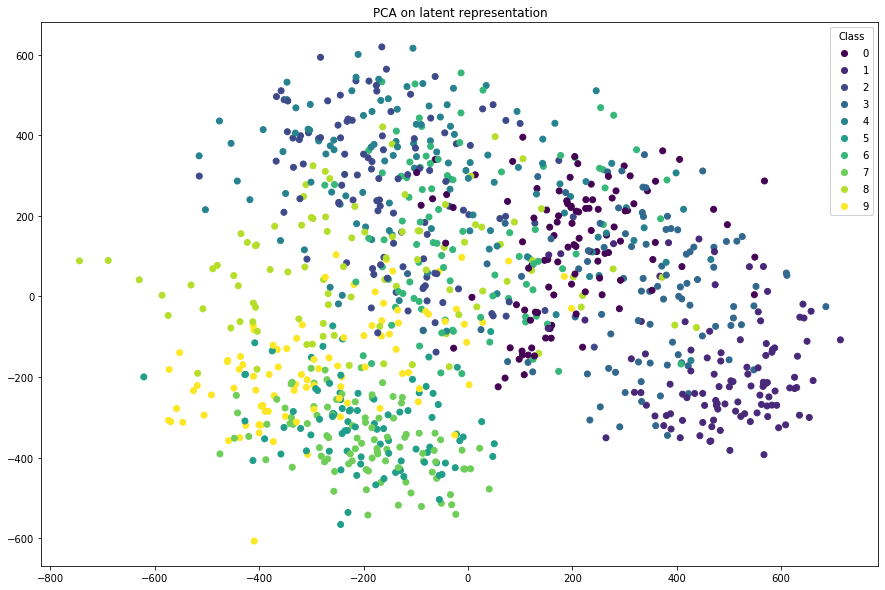

In [84]:
u6.plot_PCA_hidden(modelvae, test_loader, device, input_dim, 'PCA on latent representation', args.test_batch_size)


Repeat the <i>principal component analysis</i>, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$

Is the result of the <i>PCA</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does PCA work on them? Can you spot any differences when compared to PCA applied on the <i>input space</i> of the data set (instead of the <i>latent space</i>) and on the <i>hidden representation</i> of the <i>plain</i> autoencoder? Try to comment on you answer, but keep in mind, to compare the <i>same subset</i> of <i>targets</i>.

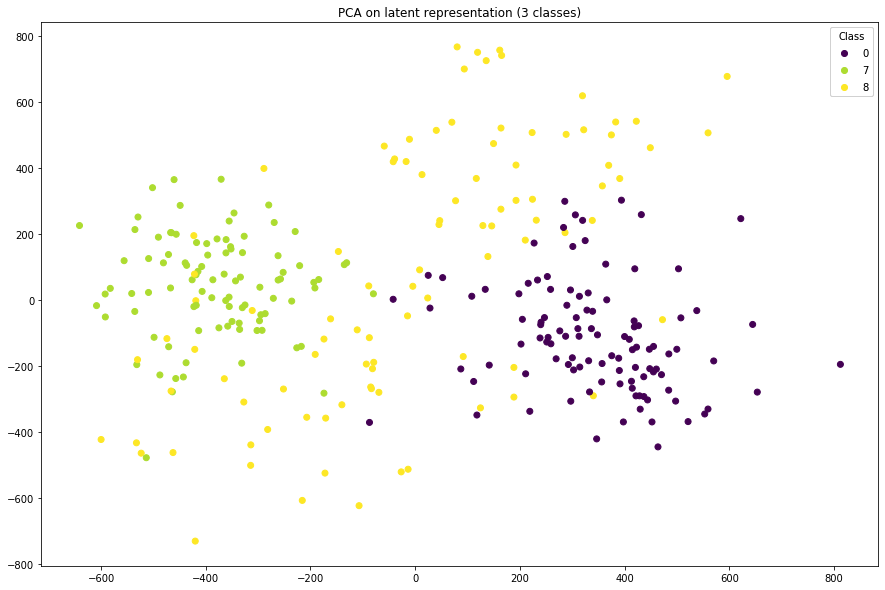

In [85]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [0,7,8])


Similar to each other:

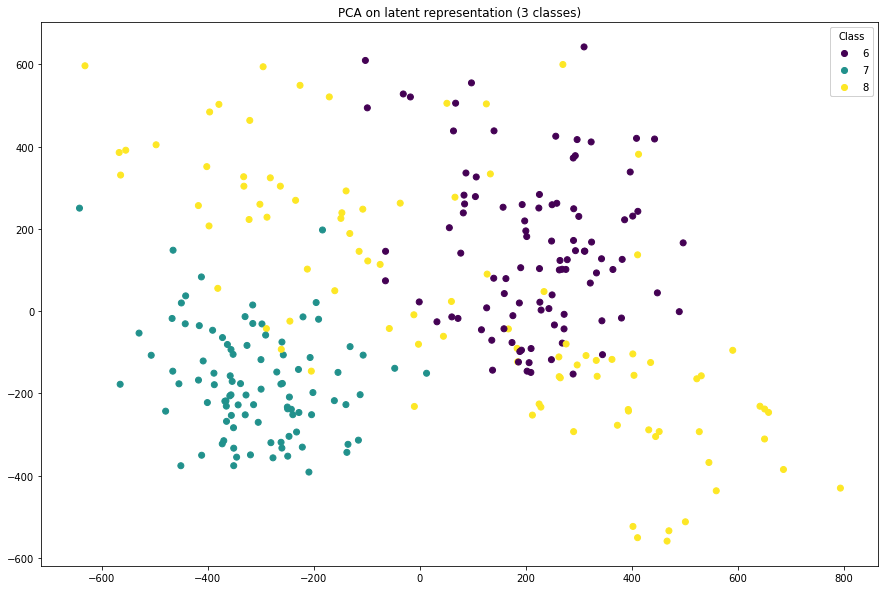

In [87]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [6,7,8])


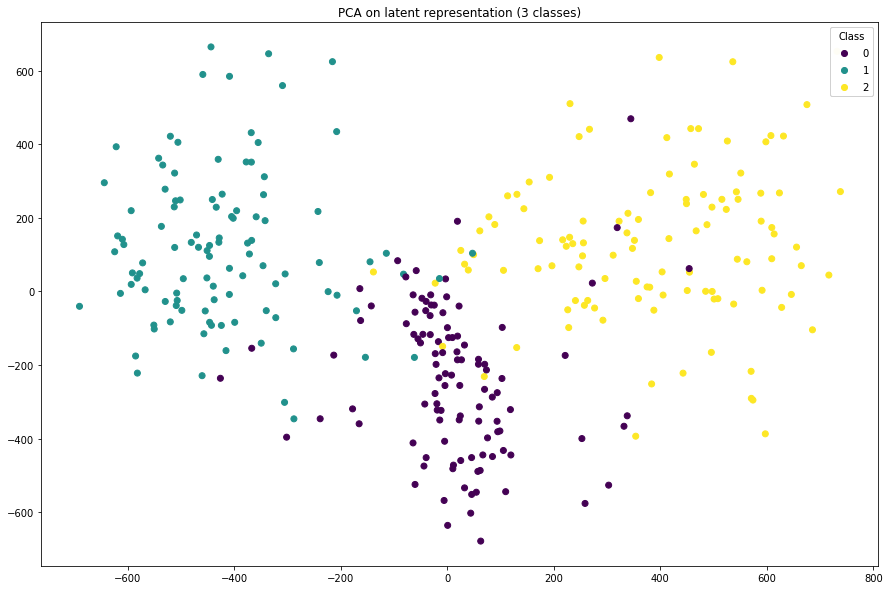

In [88]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [0,1,2])


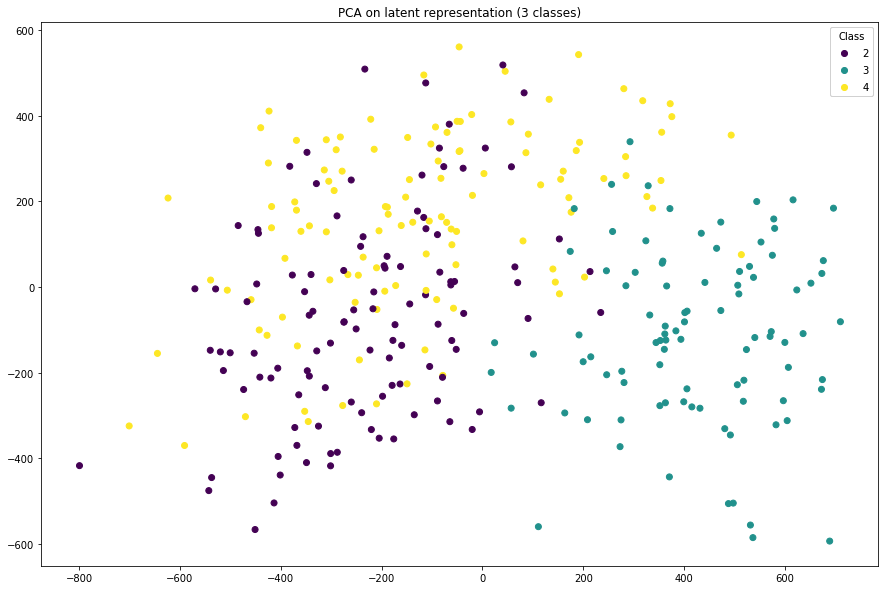

In [92]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [2,3,4])


Differentiated targets:

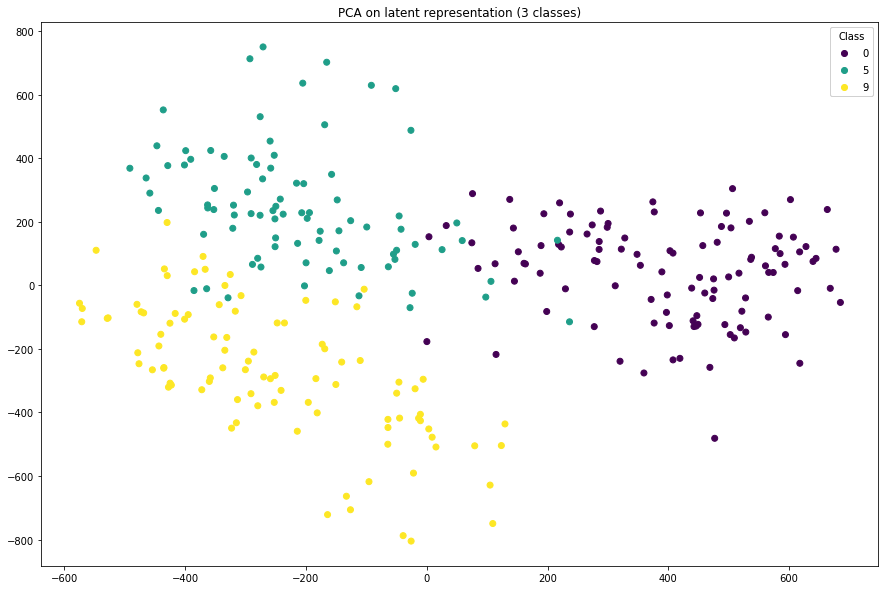

In [93]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [0,5,9])


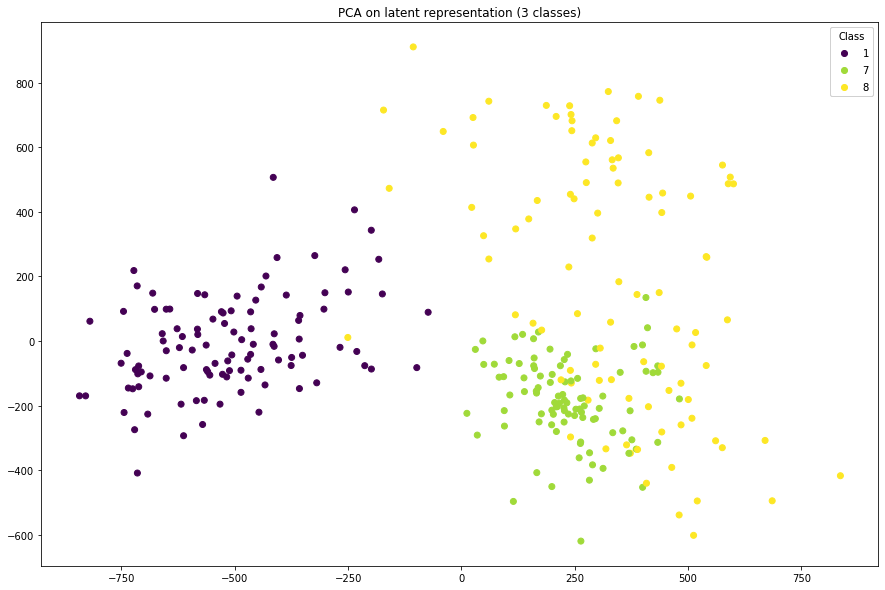

In [97]:
u6.plot_PCA_hidden_reduced(modelvae, test_loader, device, input_dim, 'PCA on latent representation (3 classes)', args.test_batch_size, [1,7,8])


I could observe, that also here class 8 spreads widely and infringes the territories of the classes 0, 6 and 7.  
<br><br>
For similar targets: Furtermore, in (6,7,8) 6 and 7 are separated. In (0,1,2) are some runaways of all three classes. Therefore, the classes are only grossly separated. (2,3,4): Here, 2 and 4 has the same territory. In other words, they aren't separated. Class 3 is grossly separated of the other classes. <br>
For differentiate targets: (0,7,8): Class 0 and 7 are separated. (0,5,9): 0 and 5 are overlapped. 9 is grossly separated. In (1,7,8) is the class 1 separated of the remaining classes. <br>
<br>
In conclusion, PCA doesn't work here quite well, because it has problems to separate class 8 from other classes. Furthermore the separtion is often only gross. 

In most cases PCA on the input space was very similar to PCA with the autoencoder. However it seems, that the widely spreaded 8 which disrupts foreign territories is less drastic on the PCA with input space.<br><br>
(0,7,8): Here, both PCAs are very similar, but on the PCA with the input space class 8 was less extremely spreading. <br>
(6,7,8): Also here the PCAs are similar. However, in PCA on input space class 8 distrubs only the territory of class 6. In PCA with the autoencoder is an offense of 8 against both territories 6 and 7.<br>
(0,1,2): In PCA on input space class 0 comes very close to 1. In PCA with the autoencoder all three classes have runaways. <br>
(2,3,4): Very similar PCAs <br>
(0,5,9): PCA on input space: 5 and 9 are overlapped. 0 is separated. PCA with autoencoder: 0 and 5 are overlapped and 9 is grossly separated. <br>
(1,7,8): In PCA on input space class 8 spreads widely but doesn't disturb other territories much compared to PCA with autoencoder. 

The results of the two dimensionality reduction techniques, <i>principal component analysis</i> and <i>t-distributed neighbor embedding</i>, might vary a lot. Hence, your <b>second task</b> of this exercise comprises the analysis of the <i>latent space</i> of some Fashion-MNIST entries using <i>t-SNE</i>.

- Set the <i>random seed</i> to $s = 42$ using the <i>numpy</i> interface.
- Apply <i>t-SNE</i> on the <i>latent representation</i> of the first $n = 1000$ entries and project them down to <i>two</i> components.
- Display the resulting data in a colored <i>scatter plot</i>.

Hint: the latter two steps can be performed at <i>once</i> (look at the notebook presented during the lecture or the accompanying <code>u6_utils.py</code> file).

In [32]:
X = torch.rand(42) 


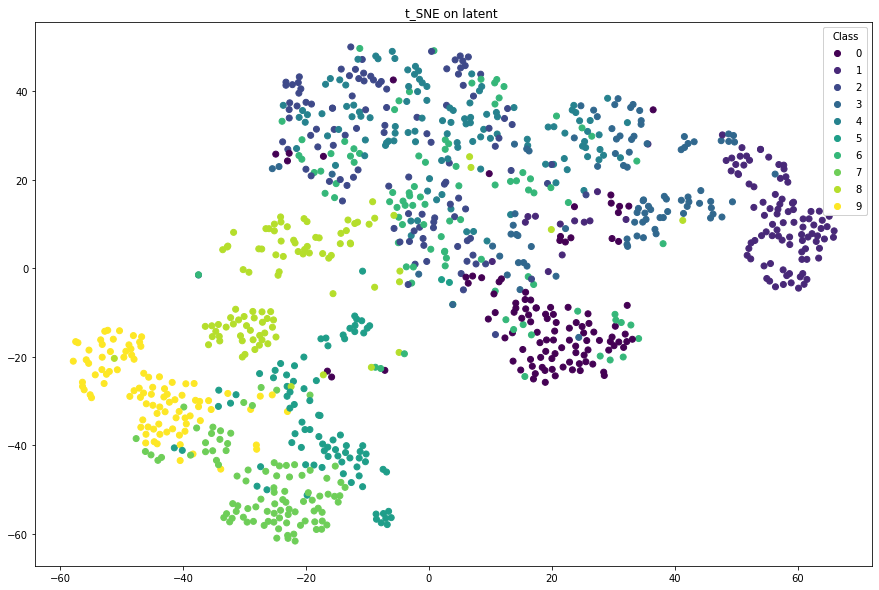

In [52]:
u6.plot_tsne_hidden(modelvae, test_loader, device, input_dim, 't_SNE on latent ', args.test_batch_size)


Repeat the <i>t-distributed stochastic neighbor embedding</i> approach, while considering only the following <i>targets/classes</i>:

- $c = (0, 7, 8)$

Is the result of the <i>t-SNE</i> applied on only those <i>three</i> classes more distinctive compared to the previous plot (which considered <i>all</i> classes)? Experiment with different <i>targets</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

How does t-SNE work on them? Can you spot any differences when compared to t-SNE applied on the <i>input space</i> of the data set (instead of the <i>latent space</i>) and on the <i>hidden representation</i> of the <i>plain</i> autoencoder? Try to comment on you answer, but keep in mind, to compare the <i>same subset</i> of <i>targets</i>.

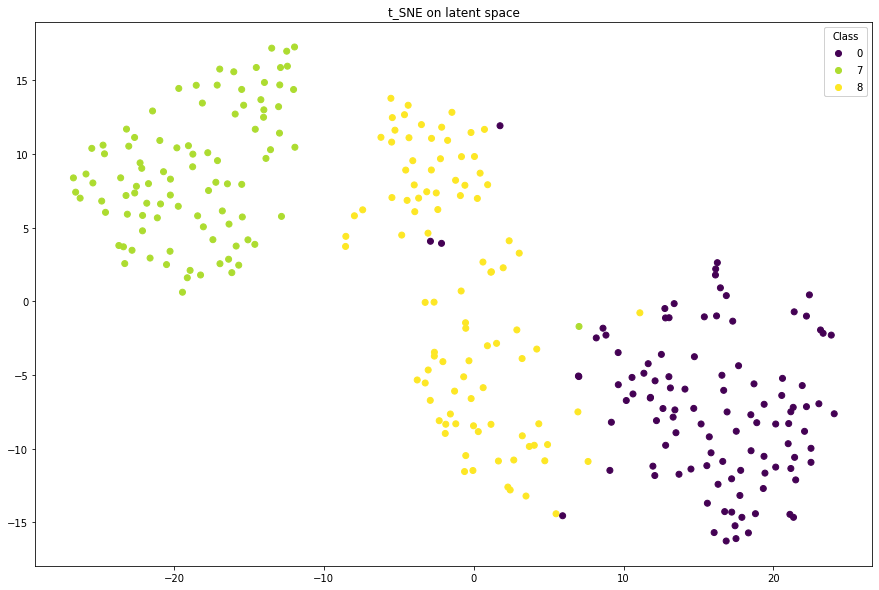

In [53]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,7,8])


Similar targets:

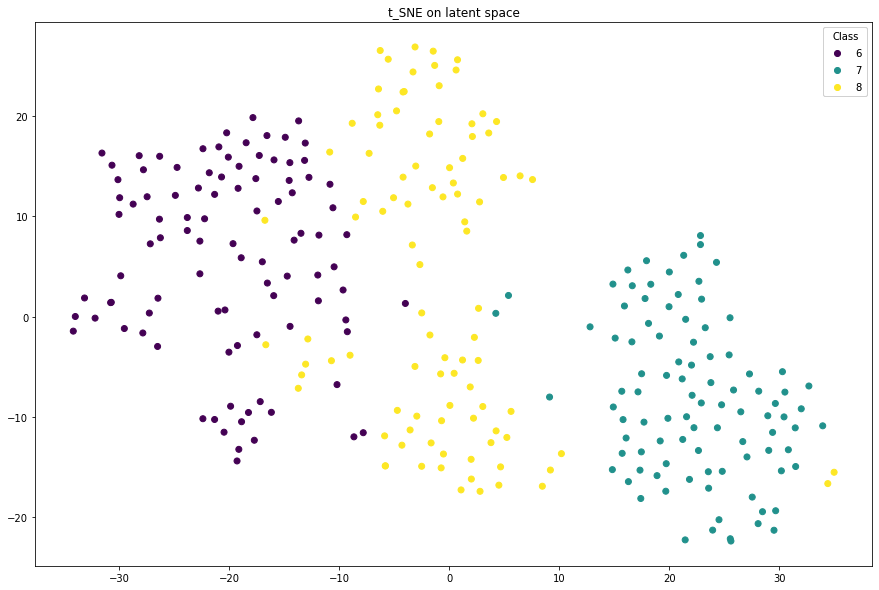

In [98]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [6,7,8])


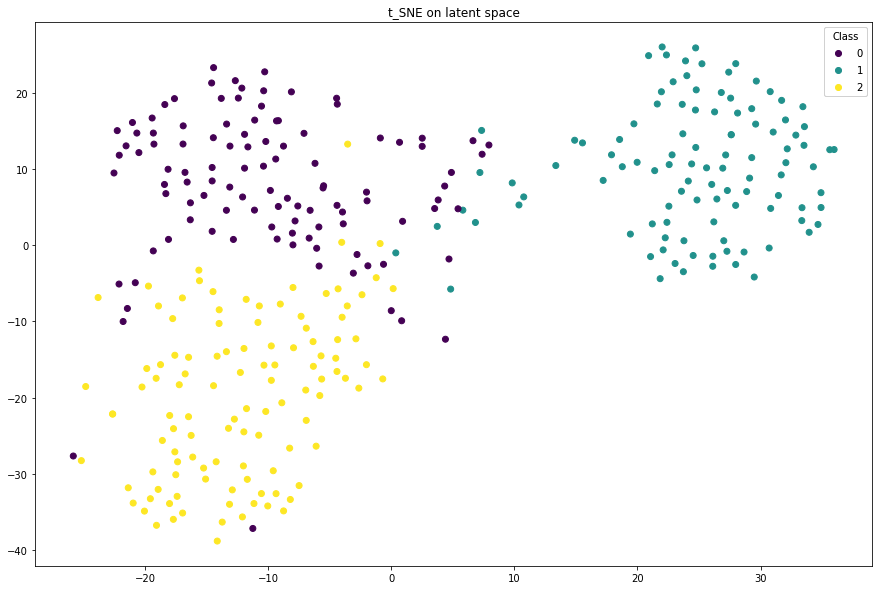

In [99]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,1,2])


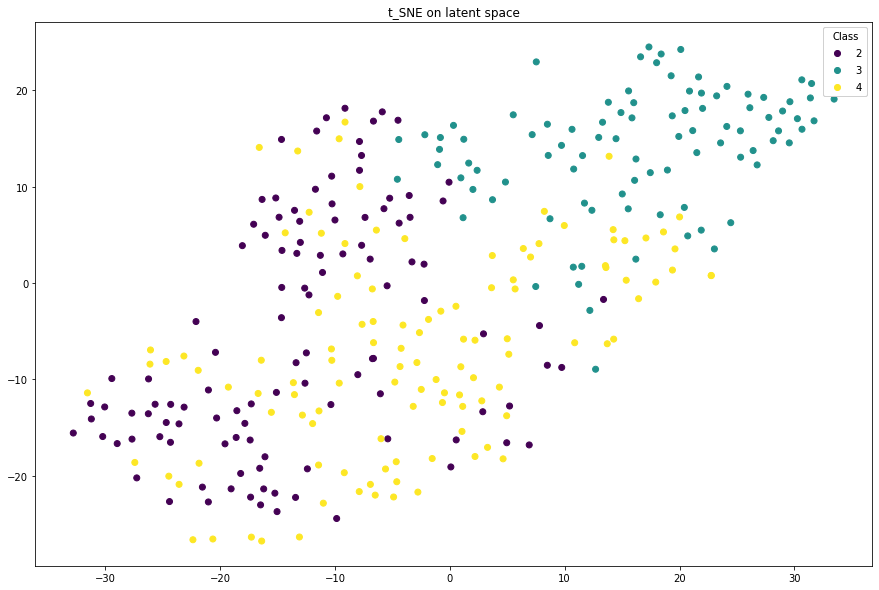

In [100]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [2,3,4])


Differentiated targets:

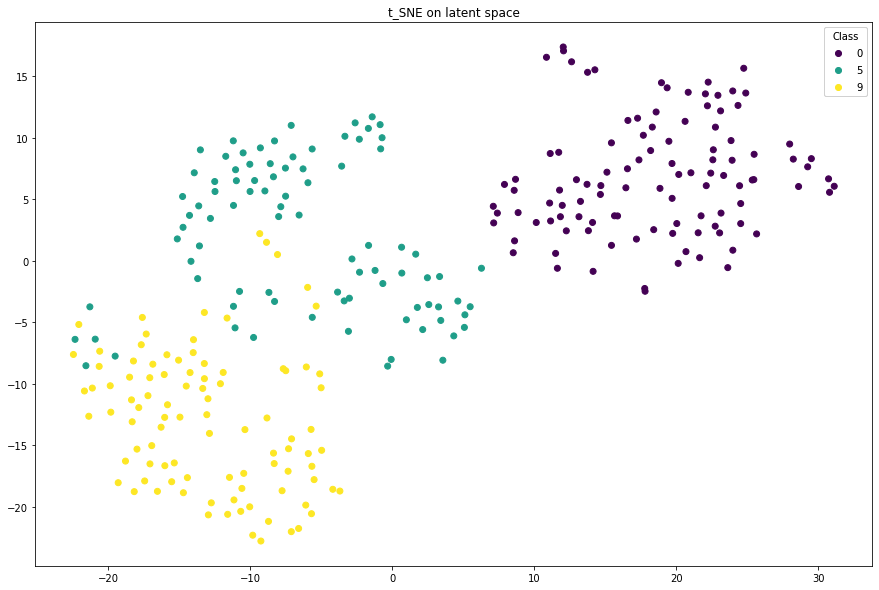

In [101]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [0,5,9])


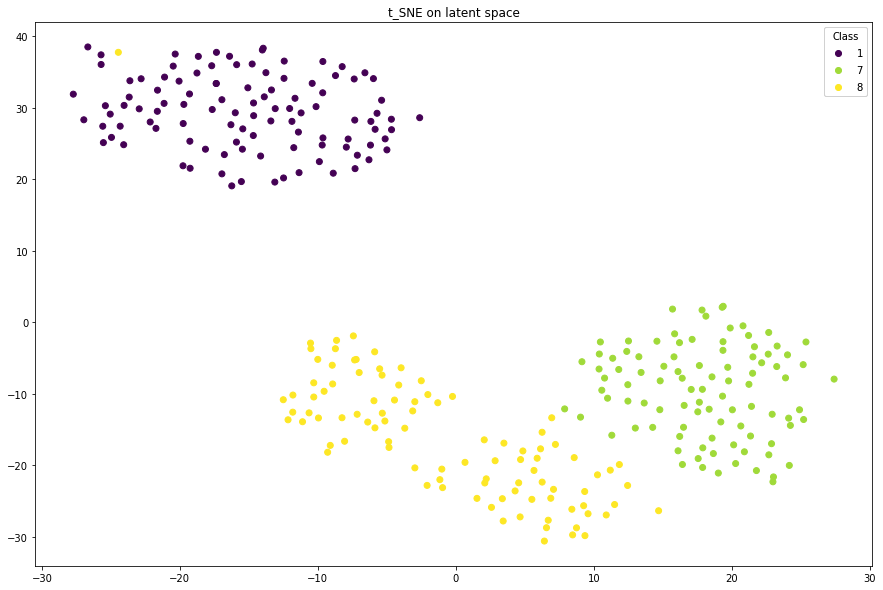

In [102]:
u6.plot_tsne_hidden_reduced(modelvae, test_loader, device, input_dim, 't_SNE on latent space', args.test_batch_size, [1,7,8])


Similar targets:<br>
(6,7,8): 6 and 7 are a little bit overlapped. Apart from this, here is a good separation. <br>
(0,1,2): Also here, 0 and 2 are a bit overlapped. 0 stays close to 1. However, you can easily recognize a separation. <br>
(2,3,4): The three classes seem to be mixed up with each other. So here is almost no separation.<br>
Differentiate targets:<br>
(0,7,8): Very well separated.<br>
(0,5,9): The territory of 5 is dirsturbed by 9 and vice versa. 0 is well separated from the other classes. <br>
(1,7,8): Here is a nice separation.

t-sne on latent space a) vs. t-sne with autoencoder b): <br>
Similar targets:<br>
(6,7,8): 6 and 7 are a little bit overlapped in b). Apart from this, here is a good separation. In a) class 8 contains two clusters. The separation is not as good as in b). <br>
(0,1,2): In b) 0 and 2 are a bit overlapped. 0 stays close to 1. However, you can easily recognize a separation. a) shows that 0 and 2 lay closely together. Apart from some runaways also a) shows a separation.<br>
(2,3,4): a) is more clearly separated than b). However, in both cases the classes are mixed up.<br>
(0,7,8): Very well separated for both a) and b).<br>
(0,5,9): a) and b) are very similar to each other. <br>
(1,7,8): Here is a nice separation in a) and b). However, a) has a few runaways. <br>
a) and b) are often very similar. Furthermore, their performances seem to be on the same level.

Reducing the dimensionality and plotting the result is not the only interesting analysis of a <i>hidden representation</i> of some data entries. Especially fascinating is the possibility to <i>walk</i> in the <i>latent space</i> from <i>one</i> data point to <i>another</i>. The <b>third</b> and <b>last task</b> of this exercise requires you to explore the <i>latent space</i> of the trained <i>variational autoencoder</i> model.

- Create a <i>subdirectory</i> termed <code>samples</code> in the current working directory.
- Create a <i>random</i> <code>Variable</code> of size $d_{batch} \times{} d_{h}$.
- Use the <code>decoder</code> member of the <i>variational autoencoder</i> model to process the just created <i>random variable</i>.

Now it would be interesting to actually <i>see</i> the result of the <i>decoding</i> step of the <i>variational autoencoder</i>. Therefore:

- Save the <i>decoded</i> random representation to <code>./samples/x_vae_random.png</code> (keep in mind to <i>reshape</i> the tensor accordingly).
- Read and <i>display</i> the just created file (<i>hint</i>: have a look at the notebook presented during the lecture).

In [41]:
if not os.path.exists(os.path.join(r'.', r'samples')):
    os.makedirs(os.path.join(r'.', r'samples'))
    

In [104]:
rand_var = Variable(torch.randn(args.batch_size, hidden_dim)).to(device)


In [110]:
output_vae = modelvae.decoder(rand_var).to(device)


In [111]:
u6.save_image(output_vae.view(args.batch_size, 1, 28, 28),'./samples/x_vae_random.png')


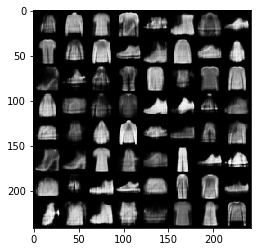

In [112]:
imagevae = mpimg.imread('./samples/x_vae_random.png')
plt.imshow(imagevae)


Choose <i>two</i> decoded entries of the previous image using the following <i>indexing</i> of an <i>entry</i> (note, that the index is computed <i>row-wise</i>):

\begin{equation}
    e_{i} = j_{row} \cdot{} d_{row} + j_{column}
\end{equation}

Whereas the single parts refer to:

- $e_{i}$ corresponds to the <i>i-th</i> entry.
- $d_{row}$ defines the amount of <i>entries</i> per row.
- $j_{row}$ specifies the <i>row</i> index (zero-based).
- $j_{column}$ specifies the <i>column</i> index (zero-based).

Plot both <i>chosen</i> entries using this notation to verify the <i>correct</i> indexing of your choices.

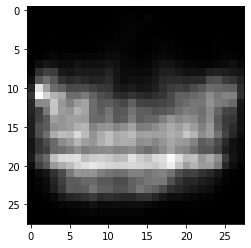

In [117]:
# First choice: unkown thing in the eigth row, in the fifth column
first_vae_c = 8*7 + 4
u6.plot_example(output_vae, first_vae_c)


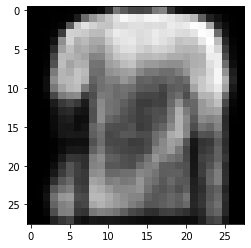

In [114]:
# Second choice: sweater in the first row and in the fourth column
second_vae_c = 8*0 + 3
u6.plot_example(output_vae, second_vae_c)


Now comes the fun part: the actual <i>walk</i> in the <i>latent space</i>. For this very purpose, the following steps are required:

- Walk in the latent space using the <code>walk_in_latent_space</code> method of <code>u6_utils.py</code> (save the result in <code>x_vae_walk.png</code>).
- Read and <i>display</i> the just created file (keep in mind, that the result of the previous step is saved in the <code>samples</code> subdirectory).

Experiment with different <i>entries</i>, which are $\ldots$

- $\ldots$ <i>similar</i> to each other.
- $\ldots$ <i>different</i> to each other.

Try to comment on the <i>transition</i> phase. Are some targets <i>more</i> suited to be transitioned into each other than others? Try to argue about <i>possible</i> reasons.

In [115]:
u6.walk_in_latent_space(modelvae, rand_var, first_vae_c, second_vae_c, args.batch_size, hidden_dim, device, "x_vae_walk.png")


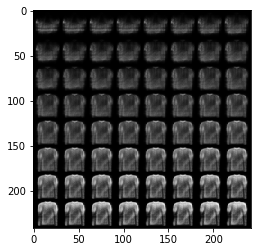

In [116]:
image_vae_walk = mpimg.imread('./samples/x_vae_walk.png')
plt.imshow(image_vae_walk)


Similar targets:

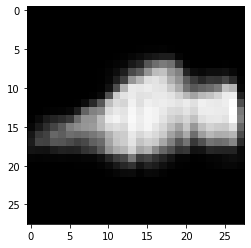

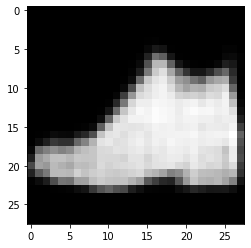

In [121]:
vae_ex_1 = 8*0 + 7
u6.plot_example(output_vae, vae_ex_1)
vae_ex_2 = 8*3 + 4
u6.plot_example(output_vae, vae_ex_2)


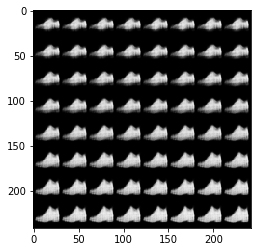

In [122]:
u6.walk_in_latent_space(modelvae, rand_var, vae_ex_1, vae_ex_2, args.batch_size, hidden_dim, device, "x_vae_walk_vae_similar_1.png")
image_vae_walk = mpimg.imread('./samples/x_vae_walk_vae_similar_1.png')
plt.imshow(image_vae_walk)

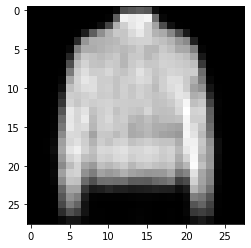

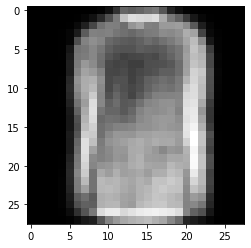

In [125]:
vae_ex_3 = 8*0 + 1
u6.plot_example(output_vae, vae_ex_3)
vae_ex_4 = 8*6 + 6
u6.plot_example(output_vae, vae_ex_4)


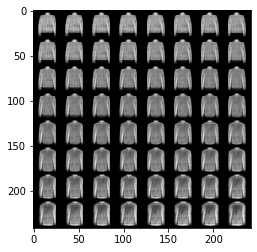

In [127]:
u6.walk_in_latent_space(modelvae, rand_var, vae_ex_3, vae_ex_4, args.batch_size, hidden_dim, device, "x_vae_walk_vae_similar_2.png")
image_vae_walk = mpimg.imread('./samples/x_vae_walk_vae_similar_2.png')
plt.imshow(image_vae_walk)


Differentiated targets:

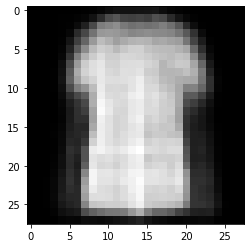

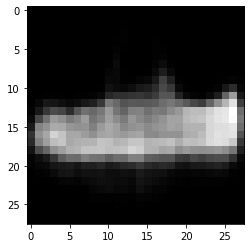

In [128]:
vae_ex_5 = 8*0 + 2
u6.plot_example(output_vae, vae_ex_5)
vae_ex_6 = 8*6 + 7
u6.plot_example(output_vae, vae_ex_6)


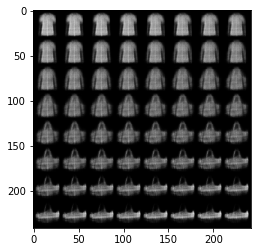

In [129]:
u6.walk_in_latent_space(modelvae, rand_var, vae_ex_5, vae_ex_6, args.batch_size, hidden_dim, device, "x_vae_walk_vae_different_1.png")
image_vae_walk = mpimg.imread('./samples/x_vae_walk_vae_different_1.png')
plt.imshow(image_vae_walk)


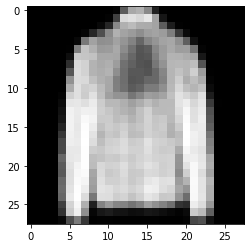

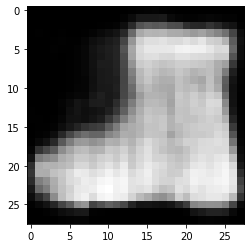

In [130]:
vae_ex_7 = 8*4 + 3
u6.plot_example(output_vae, vae_ex_7)
vae_ex_8 = 8*0 + 5
u6.plot_example(output_vae, vae_ex_8)


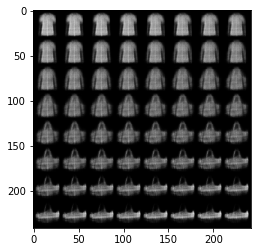

In [131]:
u6.walk_in_latent_space(modelvae, rand_var, vae_ex_5, vae_ex_6, args.batch_size, hidden_dim, device, "x_vae_walk_vae_different_2.png")
image_vae_walk = mpimg.imread('./samples/x_vae_walk_vae_different_2.png')
plt.imshow(image_vae_walk)


The walk in the latent space for similar targets isn't drastic. It looks logical to transfrom one shoe with shadows to a bright white shoe. <br>
For differentiated elements you can oberserve interesting transitions. For example, we want to transform a t-shirt into a show. The t-shirt first transforms into a t-shirt with long sleeves and then into a sewater. Then it becomes a bag which transforms into a shoe. So, you can see that more cases of different classes are covered. 